In [1]:
import matplotlib.pylab as plt
%matplotlib inline
from wordcloud import WordCloud
import nltk
from konlpy.corpus import kolaw
from konlpy.tag import *
import pandas as pd
import platform
from collections import Counter
from matplotlib import font_manager, rc
from konlpy.tag import Twitter; t = Twitter()
import numpy as np
from PIL import Image
from wordcloud import ImageColorGenerator

/home/kiwoong/anaconda3/lib/python3.7/site-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [2]:
import colorsys
import random
import platform

In [3]:
df = pd.read_csv("../petition_data_all.csv")

In [4]:
def fied_names_num(df):
    names = list(set(df["category"]))
    for name in names:
        print(name, " : ", len(df[df["category"]==name]["category"]))

In [5]:
fied_names_num(df)

외교/통일/국방  :  25277
기타  :  45658
미래  :  16852
행정  :  19038
안전/환경  :  29098
정치개혁  :  57865
농산어촌  :  1734
문화/예술/체육/언론  :  16942
저출산/고령화대책  :  3407
경제민주화  :  15870
인권/성평등  :  33035
육아/교육  :  24569
성장동력  :  6853
보건복지  :  23170
일자리  :  21593
반려동물  :  3752
교통/건축/국토  :  26517


In [6]:
fied_names_num(df[df["count"]>100])

외교/통일/국방  :  869
기타  :  1700
행정  :  825
미래  :  377
안전/환경  :  1528
정치개혁  :  2360
농산어촌  :  72
문화/예술/체육/언론  :  1019
저출산/고령화대책  :  173
경제민주화  :  740
인권/성평등  :  2166
육아/교육  :  1741
성장동력  :  129
보건복지  :  1314
일자리  :  628
반려동물  :  384
교통/건축/국토  :  1281


In [7]:
df = df[df["count"]>100]

In [8]:
def grey_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(60, 100)

In [9]:
def make_cloud(category, png_name=0,state="no", background_color_n='white', max_font_size_n = 40):
        
    df1= (df[df["category"]==category])

    text = list(df1["petition_overview"])
    text = ' '.join(text)
    
    ko_con_text = text
    print(len(text))
    #print(text)
    tokens_ko = t.nouns(ko_con_text)
    print("ok")
    stop_words = ['직','제','저', '이','그','때','및','것이','합니다.','\\n',':','','거','수','그' ,"합","이","있는","있습니다.","것","및","하지만","때문에"]
    tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]

    text = ' '.join(tokens_ko)
    #text
    #f = open(category+".txt", 'w')
    #f.write(text)
    #f.close()

    ko = nltk.Text(tokens_ko, name= category+' 청원')

    font_name = font_manager.FontProperties(fname="/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf").get_name()
    rc('font', family=font_name)
    %matplotlib inline

    data = ko.vocab().most_common(500)
    tmp_data = dict(data)

    if(png_name):
        korea = np.array(Image.open("img/"+png_name))
    else:
        korea = np.array(Image.open("img/"+category+"1.png"))
    
    image_colors = ImageColorGenerator(korea)
    
    
    wordcloud = WordCloud(font_path="/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf",
                         relative_scaling = 0.2, mask=korea,
                         background_color=background_color_n,
                          min_font_size=1, max_font_size=max_font_size_n
                         ).generate_from_frequencies(tmp_data)
    plt.figure(figsize=(30,30))
    
    #설정에 맞게 색깔 변경
    if state == "no":
        plt.imshow(wordcloud)
    elif state == "img":
        plt.imshow(wordcloud.recolor(color_func=image_colors) ,interpolation='bilinear')
    elif state == "grey":
        plt.imshow(wordcloud.recolor(color_func=grey_color_func, random_state=3) ,interpolation='bilinear')
    else:
        plt.imshow(wordcloud.recolor(color_func=lambda *args, **kwargs: state, random_state=3) ,interpolation='bilinear')
    
    plt.axis("off")
    plt.show()

113811
ok


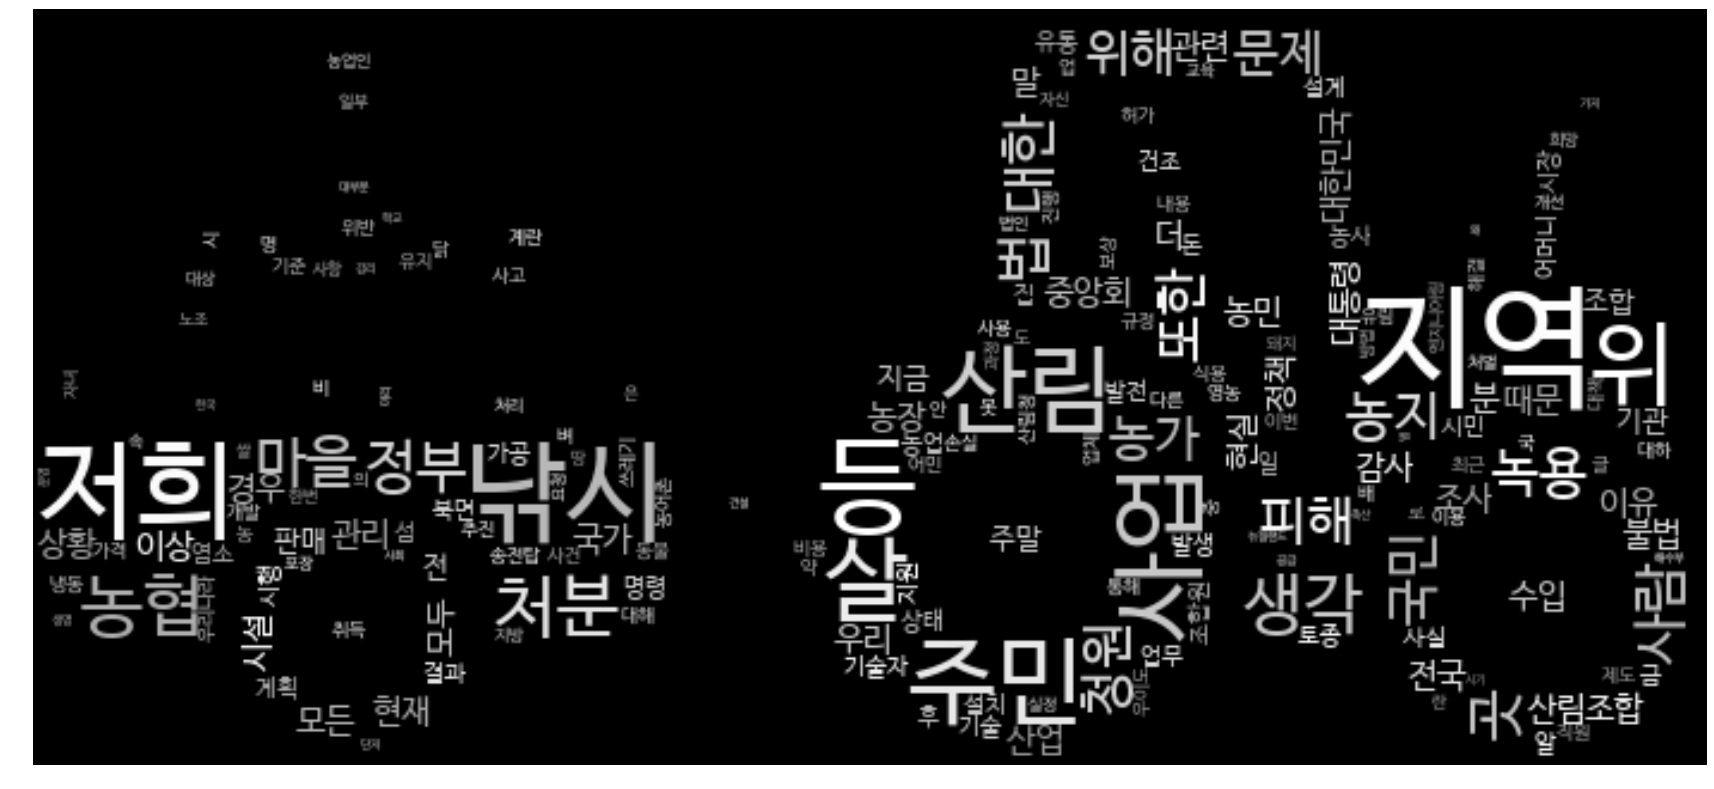

In [57]:
make_cloud("농산어촌","농산어촌1.jpg",max_font_size_n = 80,background_color_n='black',state="grey")

827757
ok


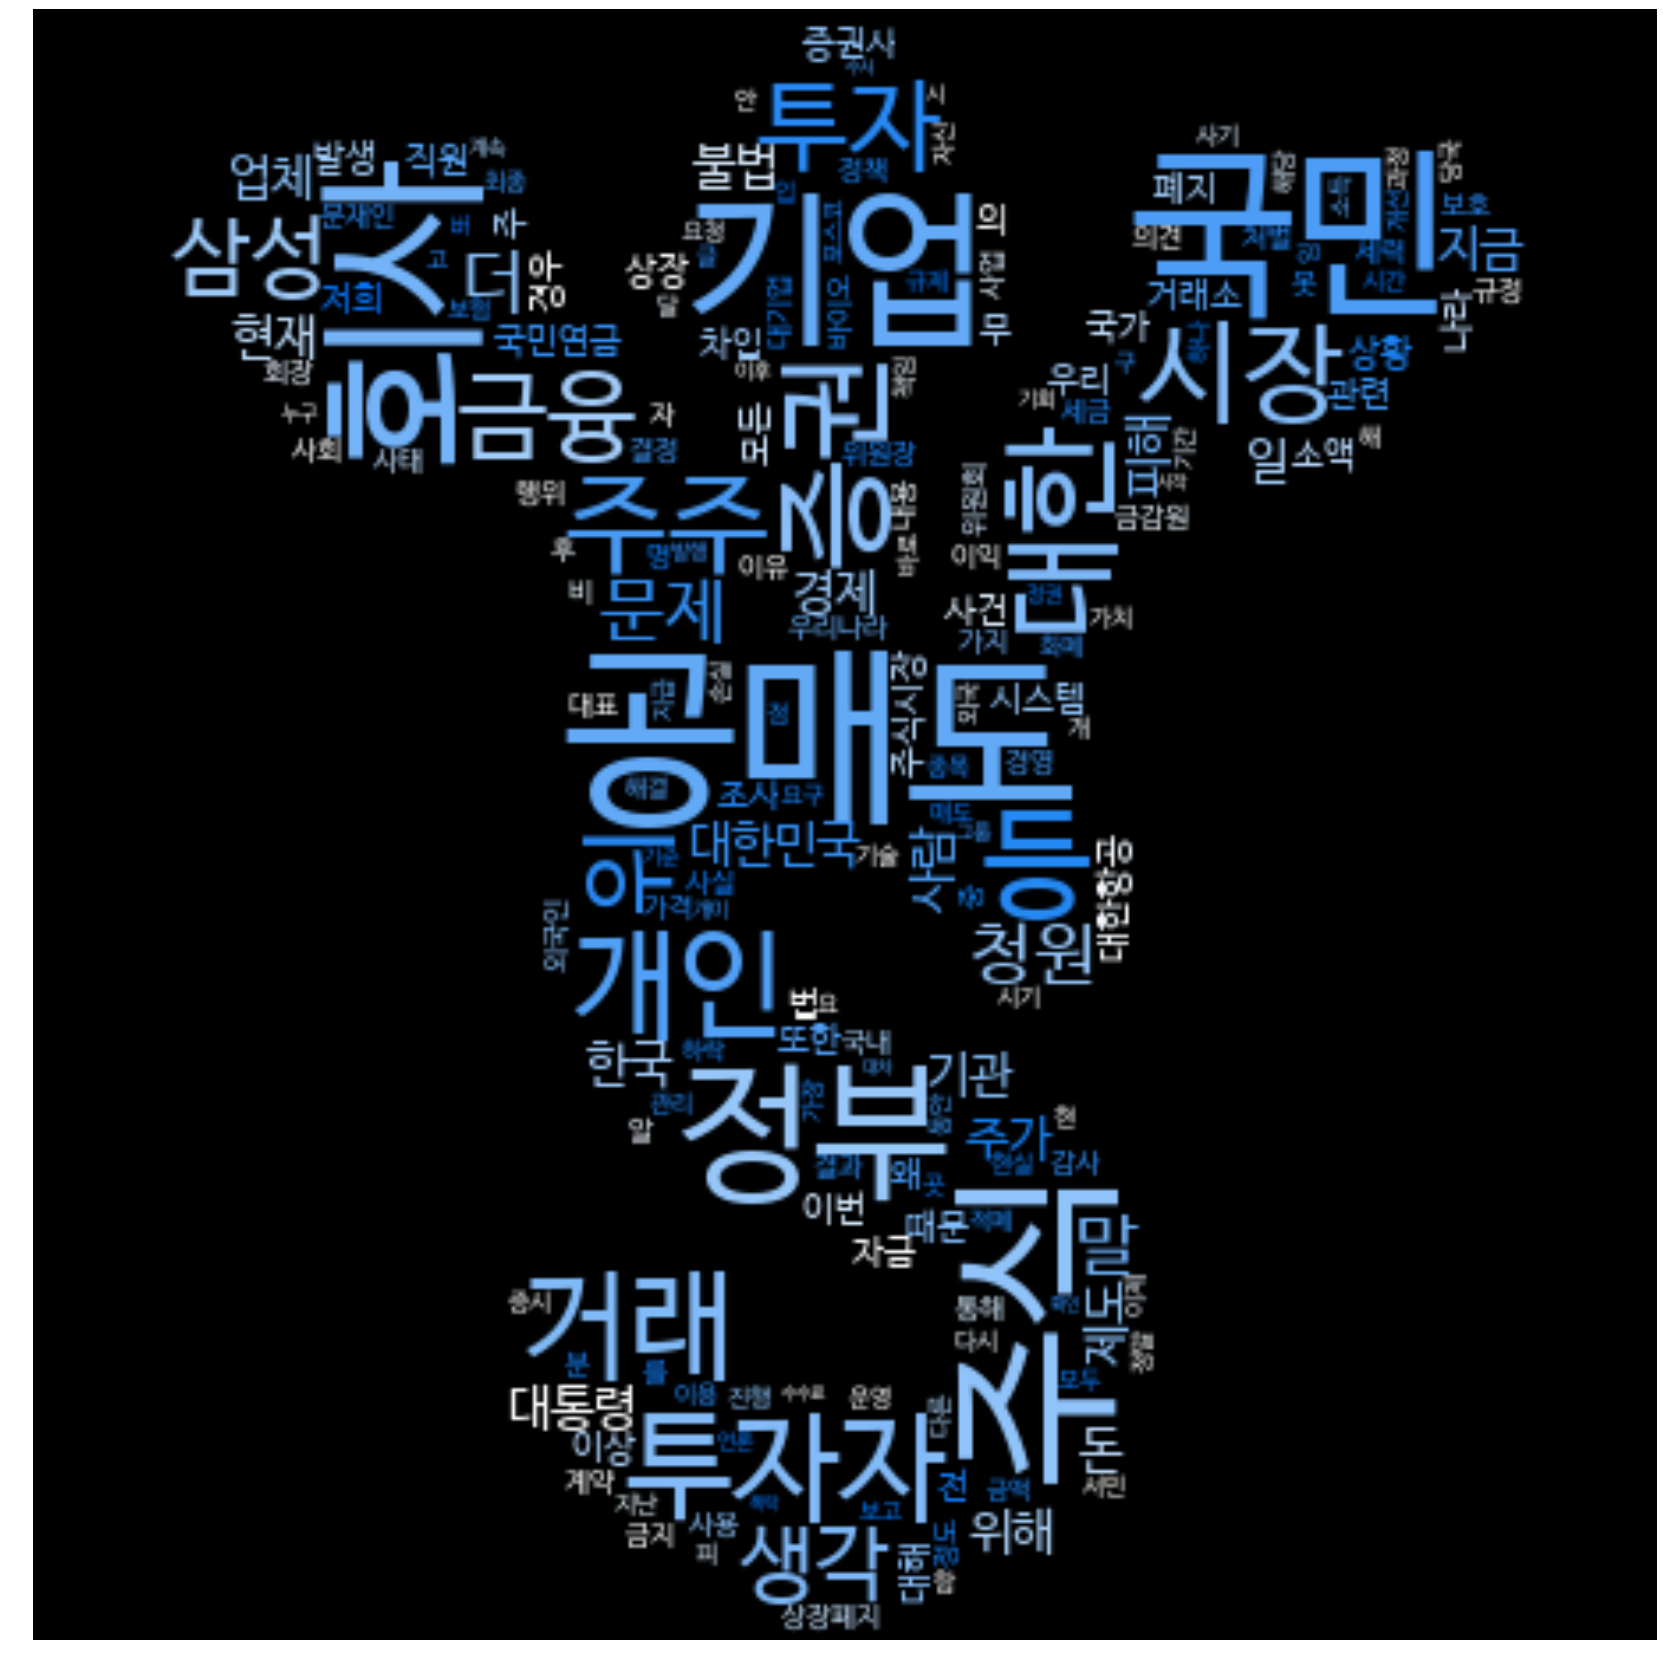

In [45]:
make_cloud("경제민주화",max_font_size_n = 100,state="img",background_color_n='black')

1635815
ok


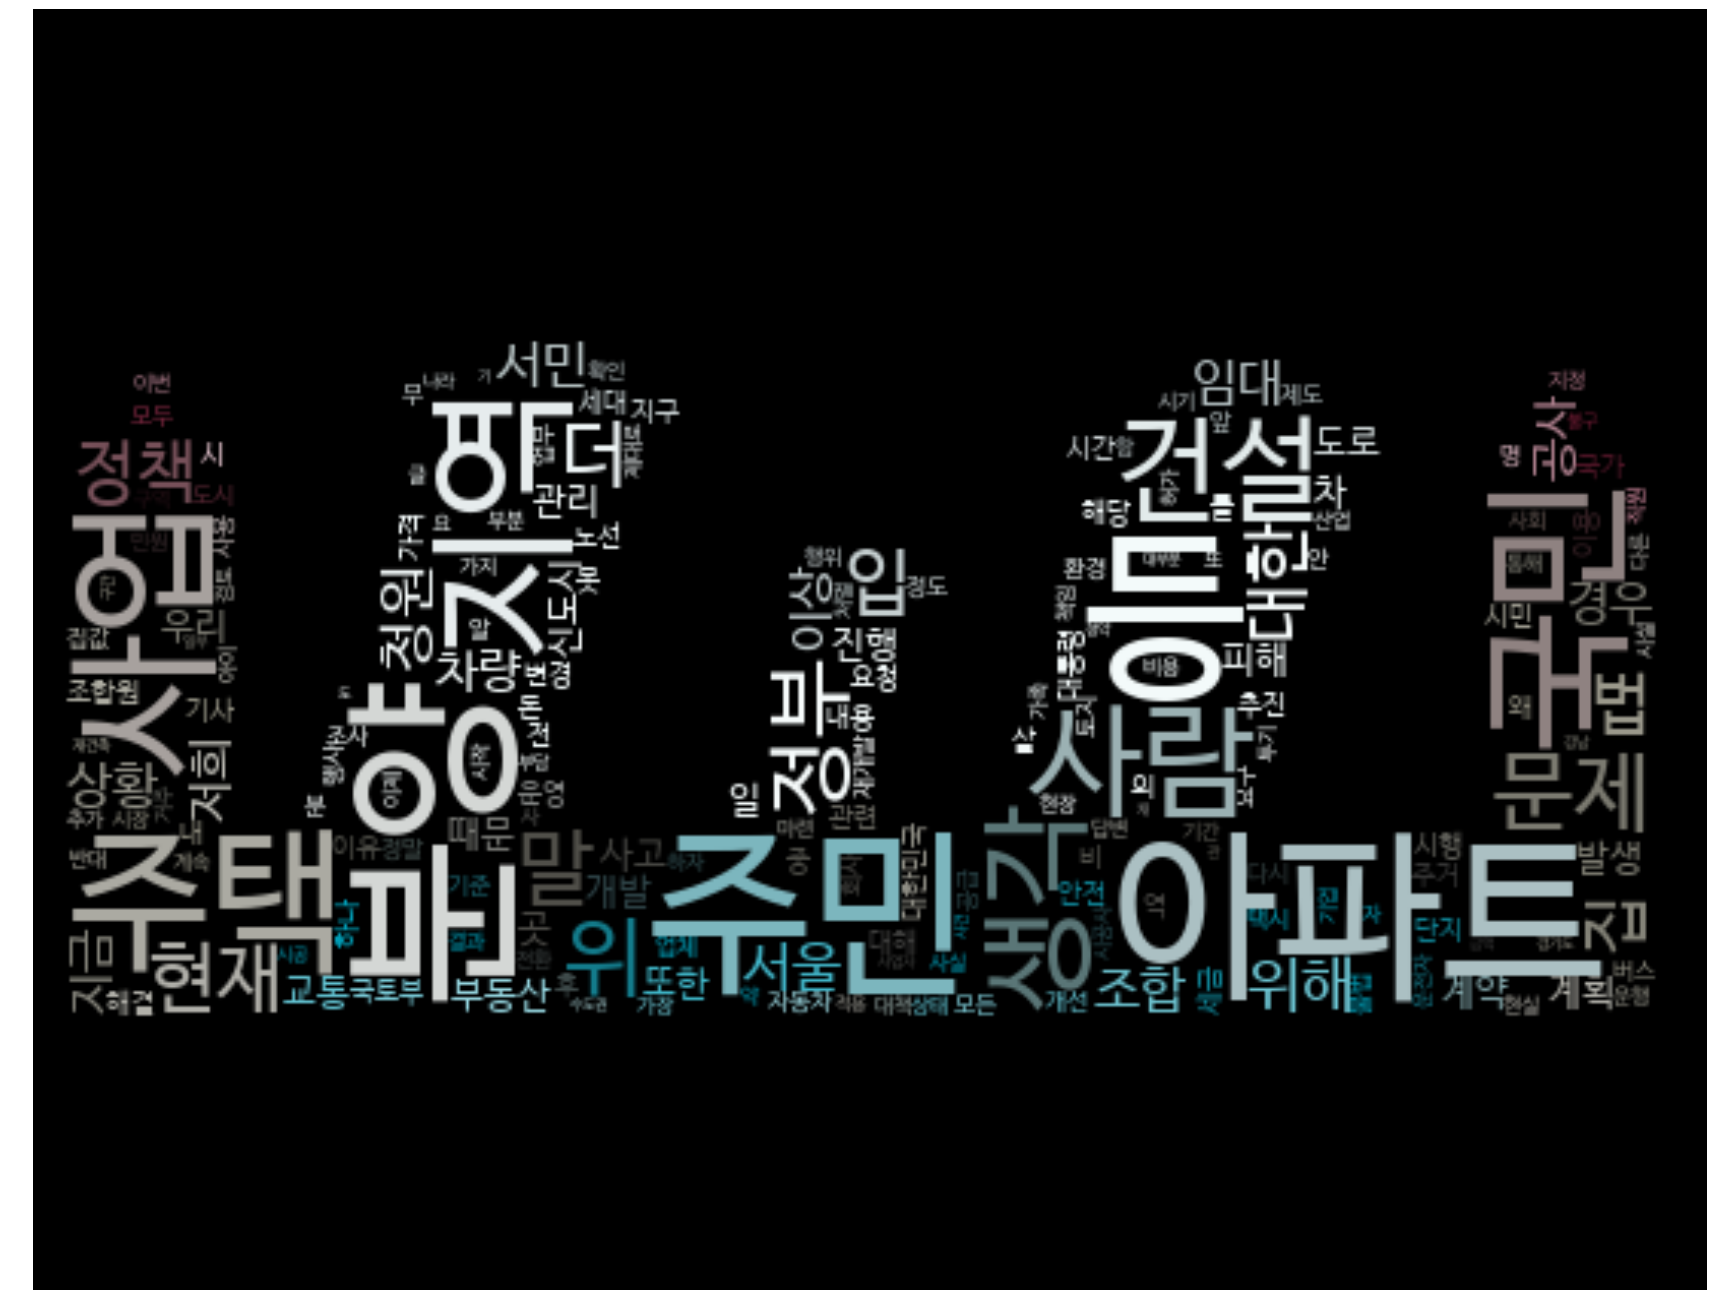

In [24]:
make_cloud("교통/건축/국토","교통_건축_국토1.png",state="img",background_color_n='black',max_font_size_n = 60)

1505633
ok


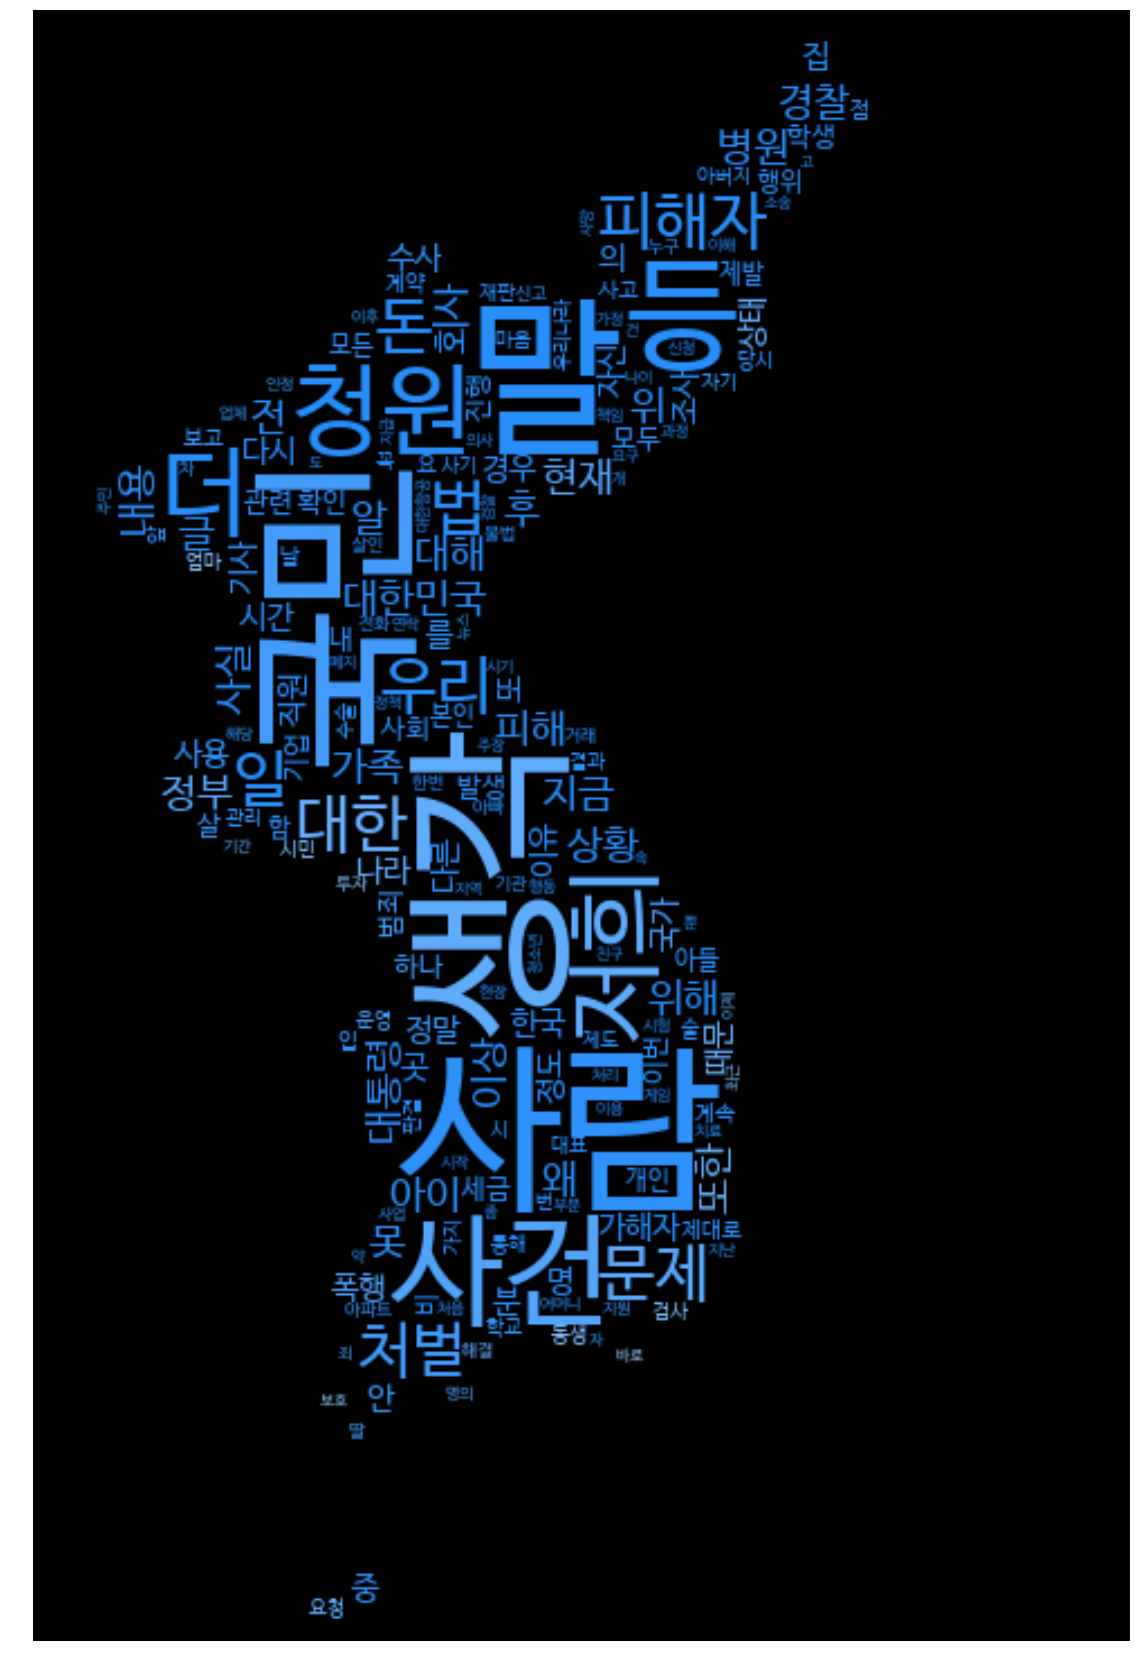

In [31]:
make_cloud("기타","기타1.jpg",state="img",max_font_size_n = 80,background_color_n='black')

869367
ok


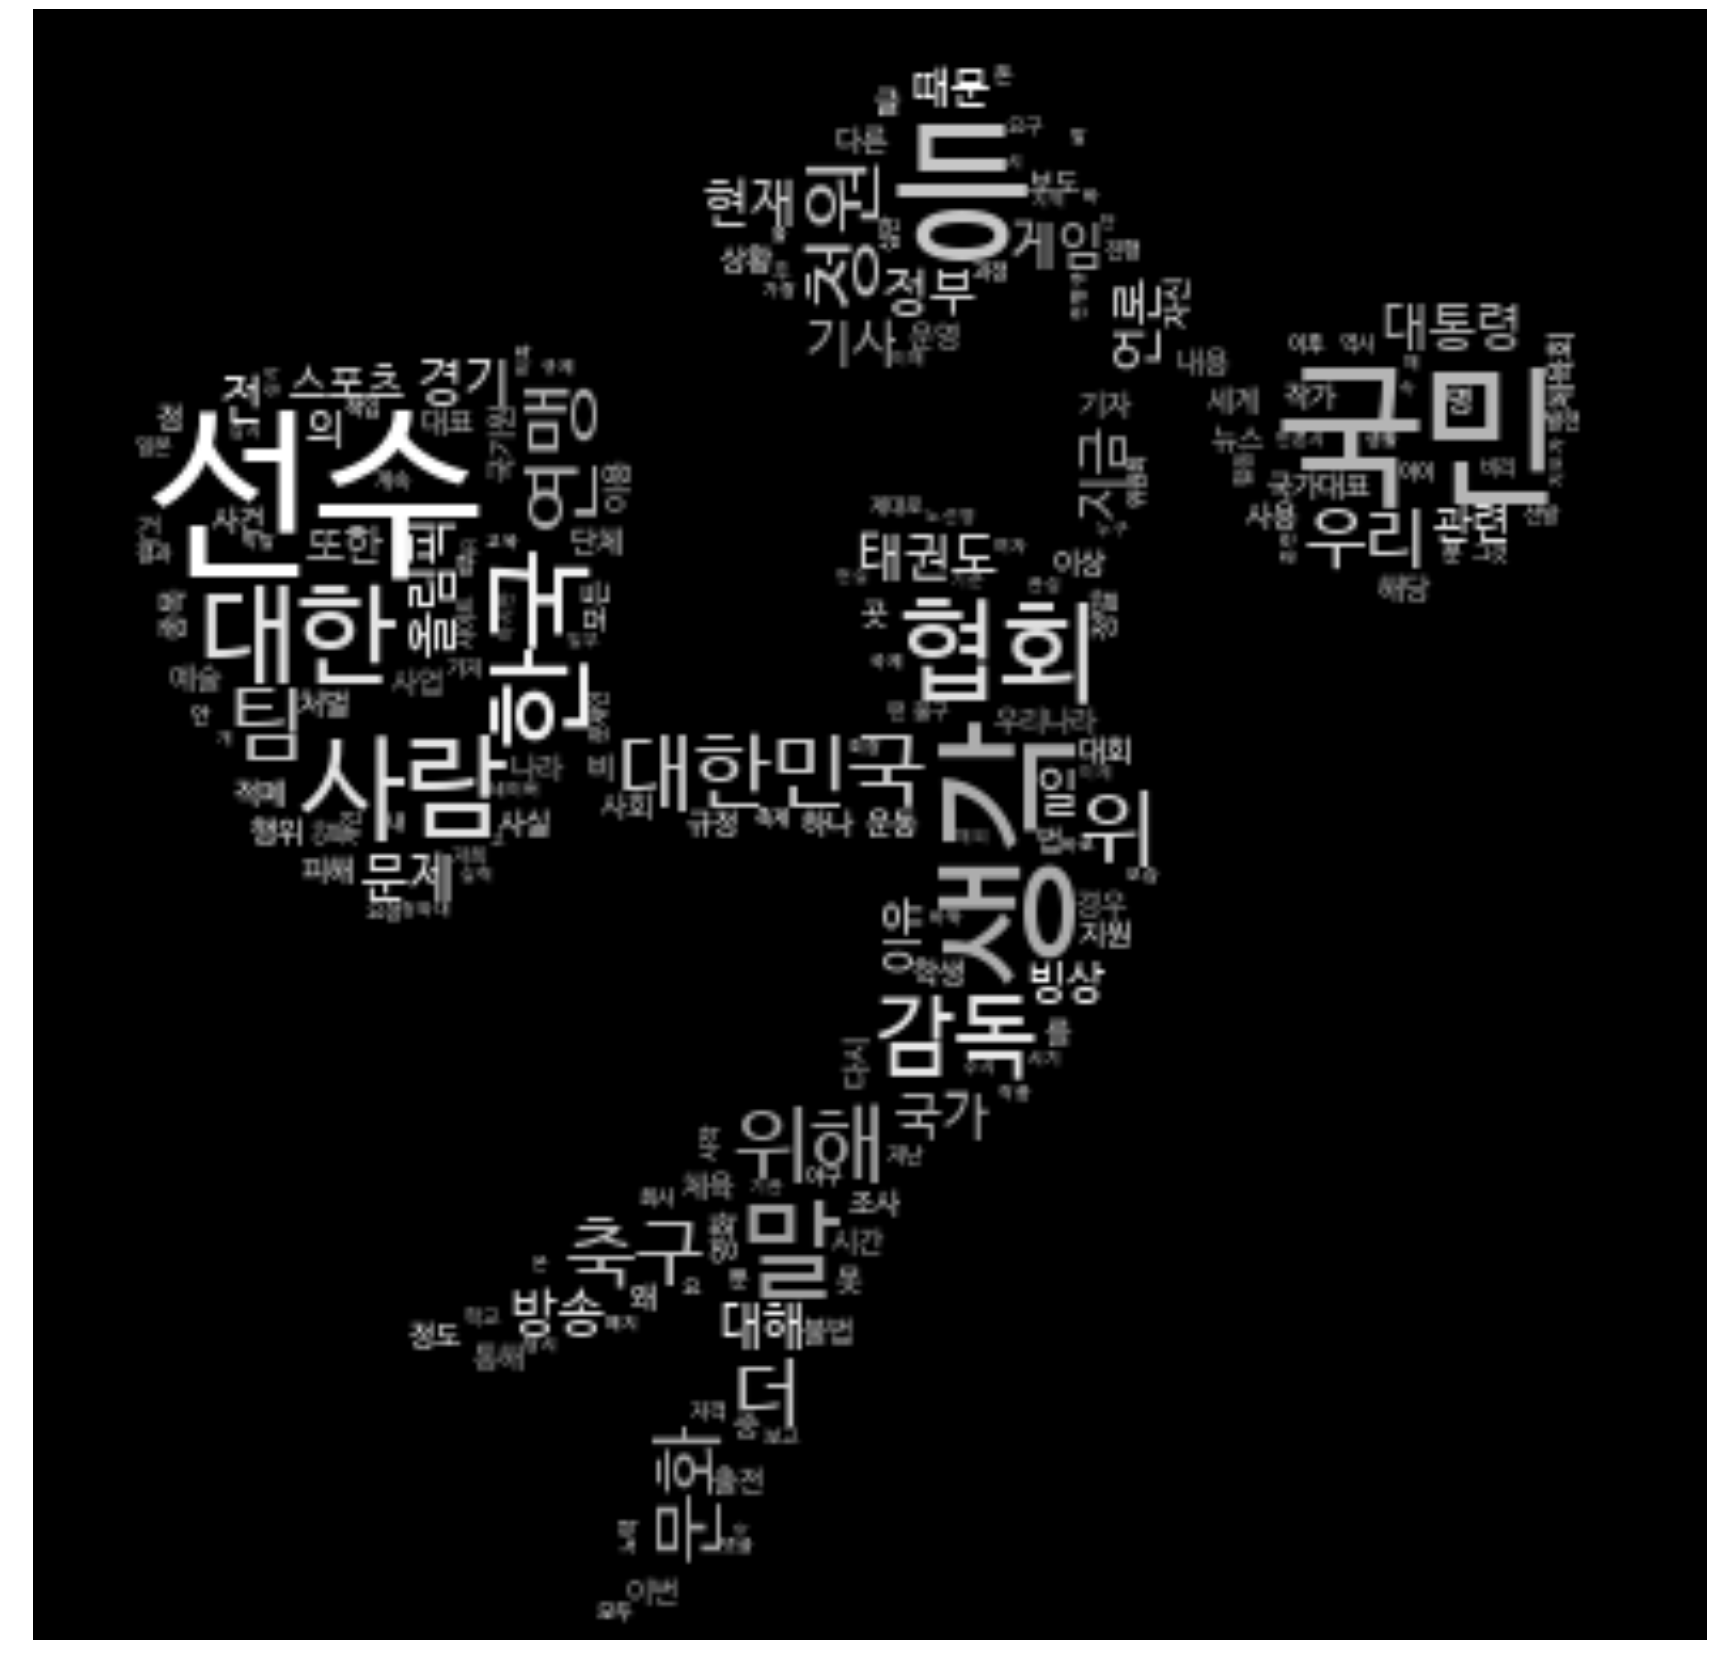

In [46]:
make_cloud("문화/예술/체육/언론","문화예술1.png",max_font_size_n = 80,background_color_n='black',state="grey")

397581
ok


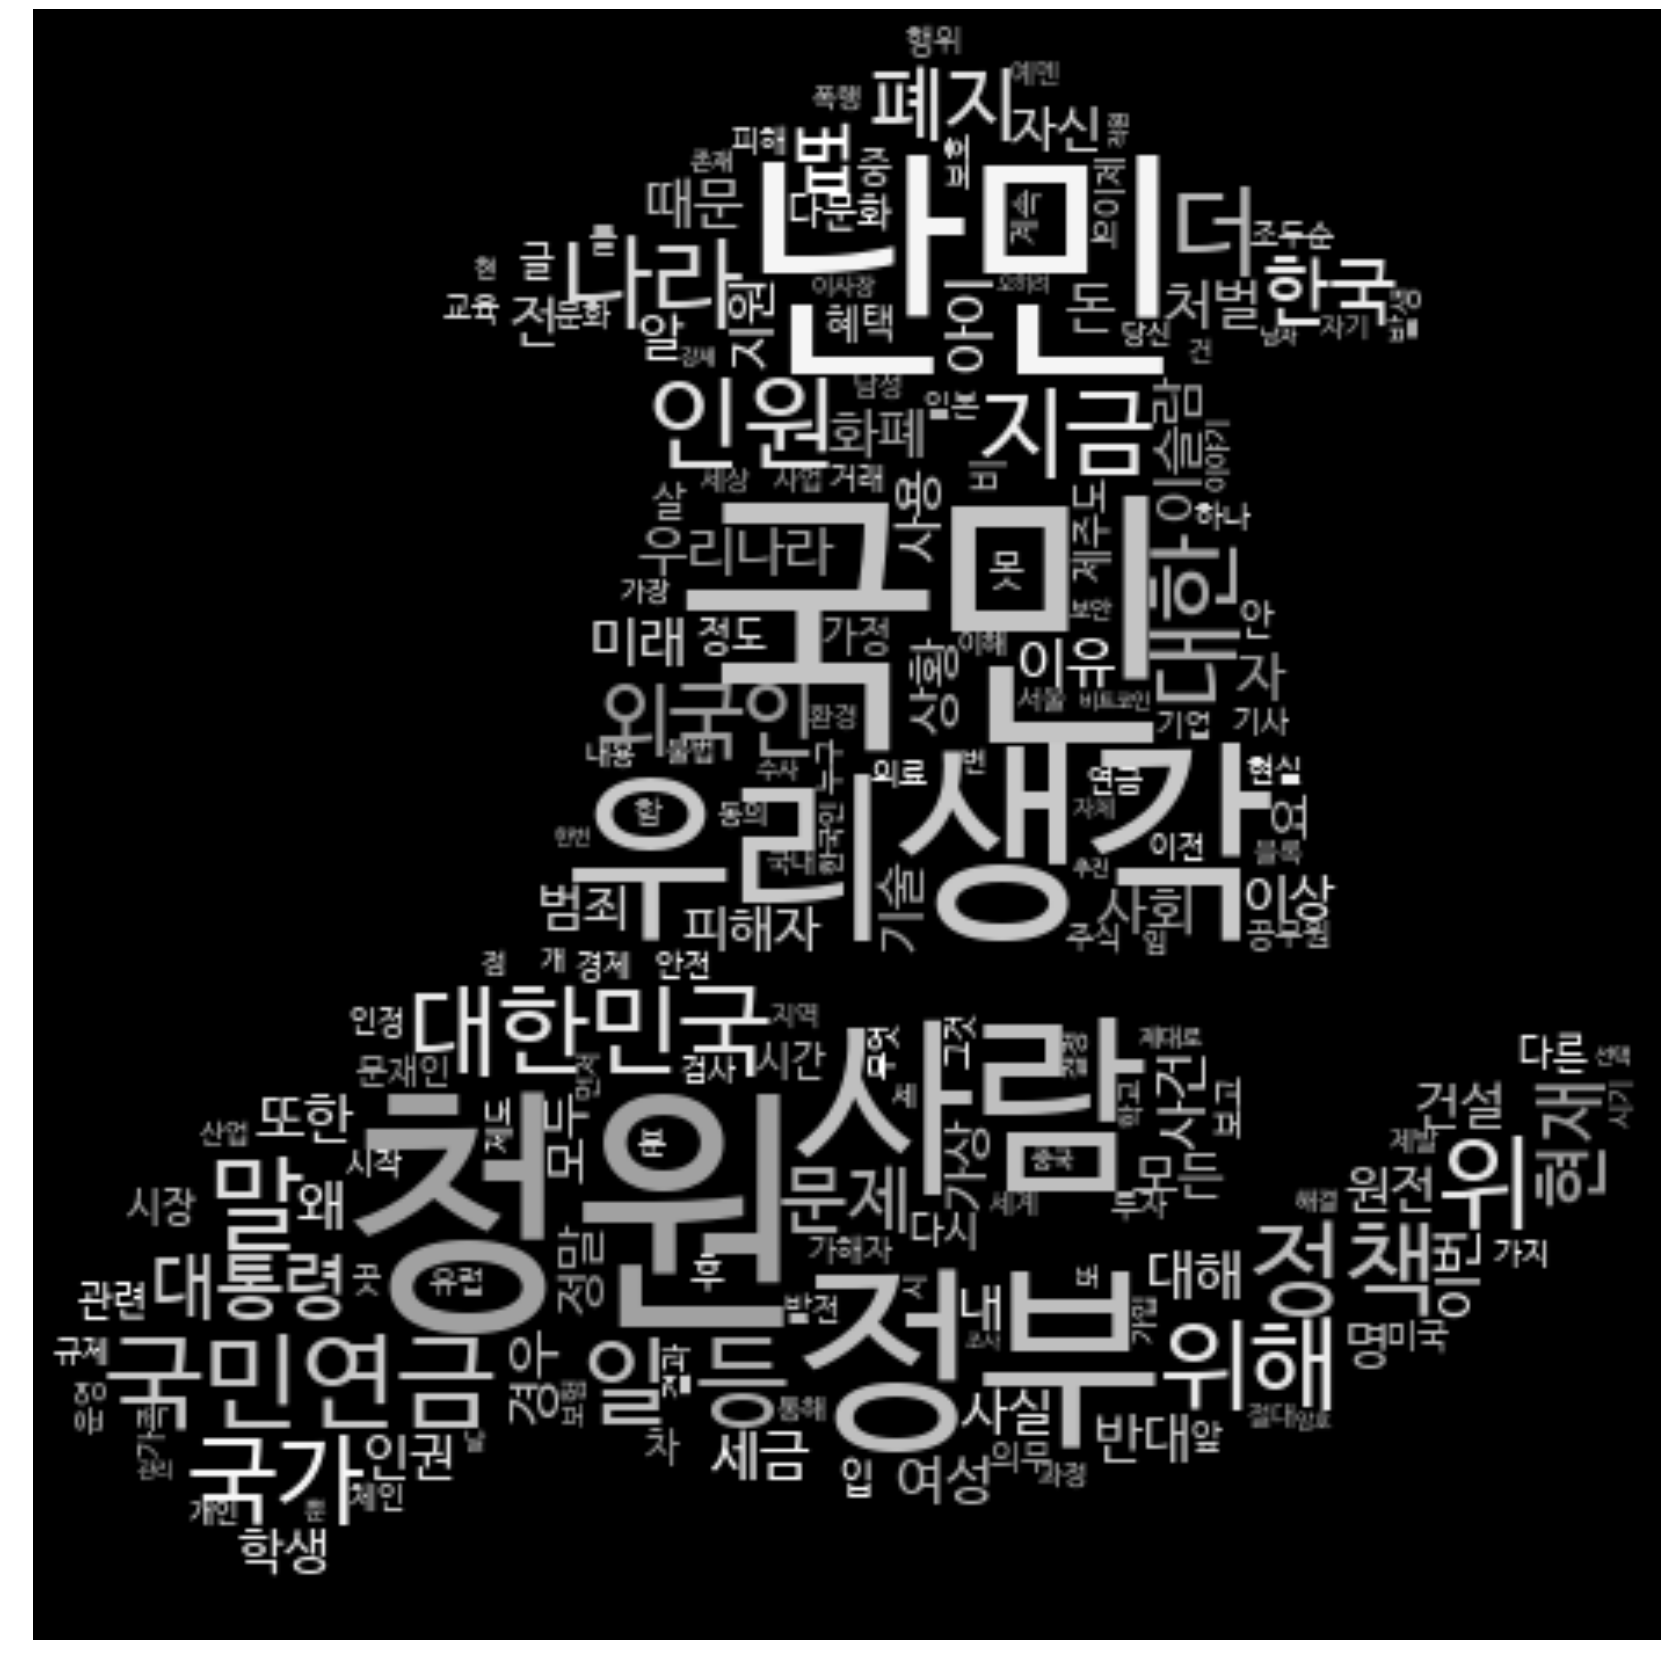

In [13]:
make_cloud("미래",max_font_size_n = 80,background_color_n='black',state="grey")

403552
ok


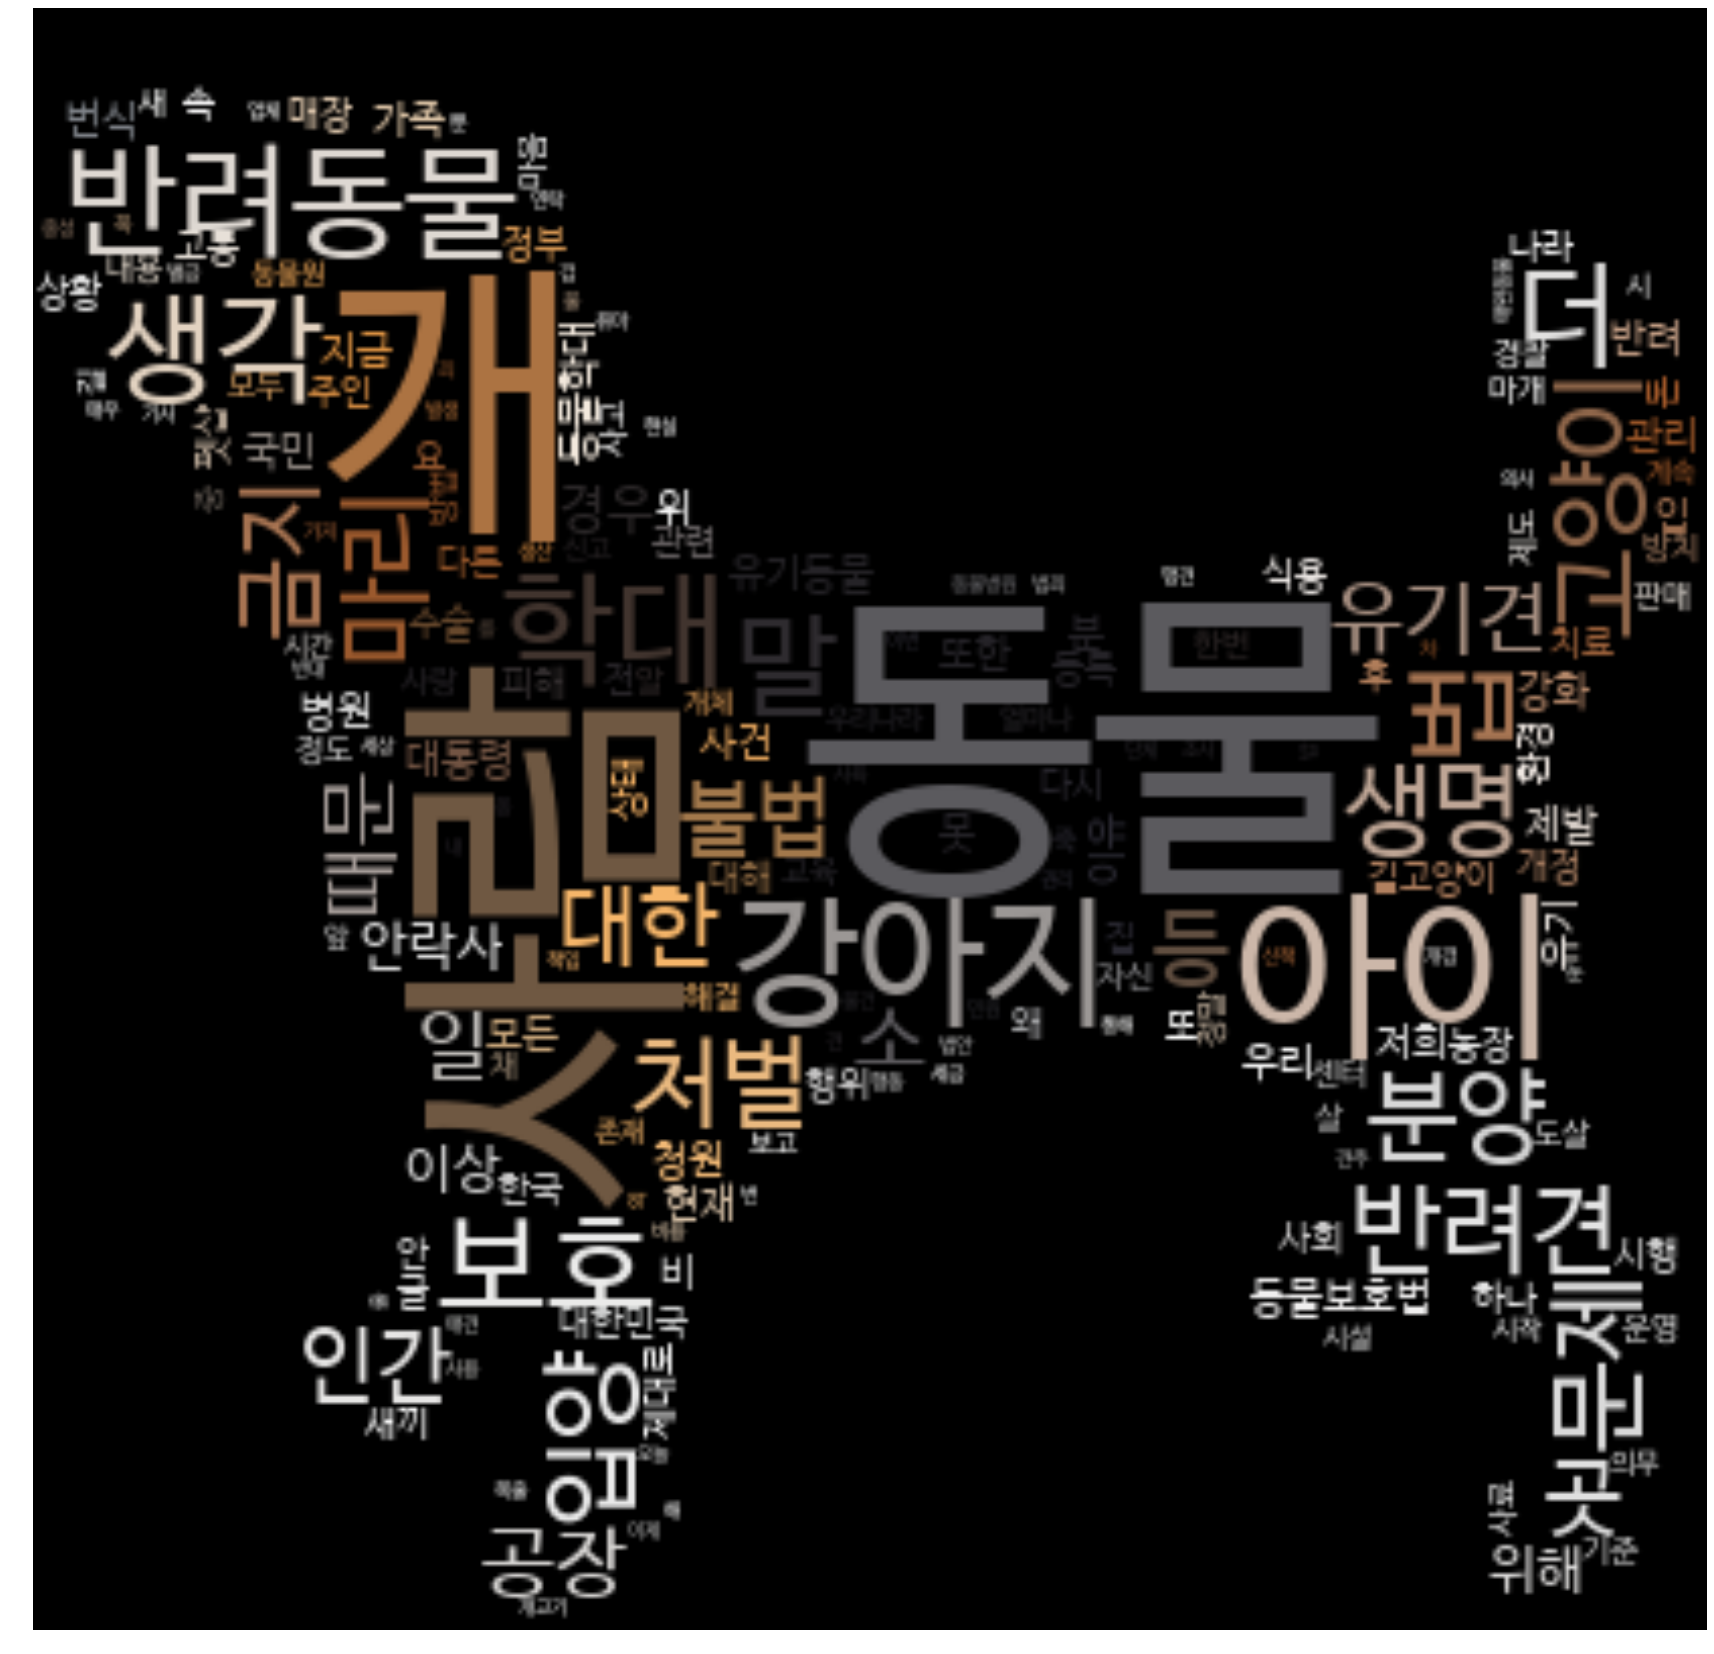

In [47]:
make_cloud("반려동물",state="img",background_color_n='black',max_font_size_n = 80)

1690191
ok


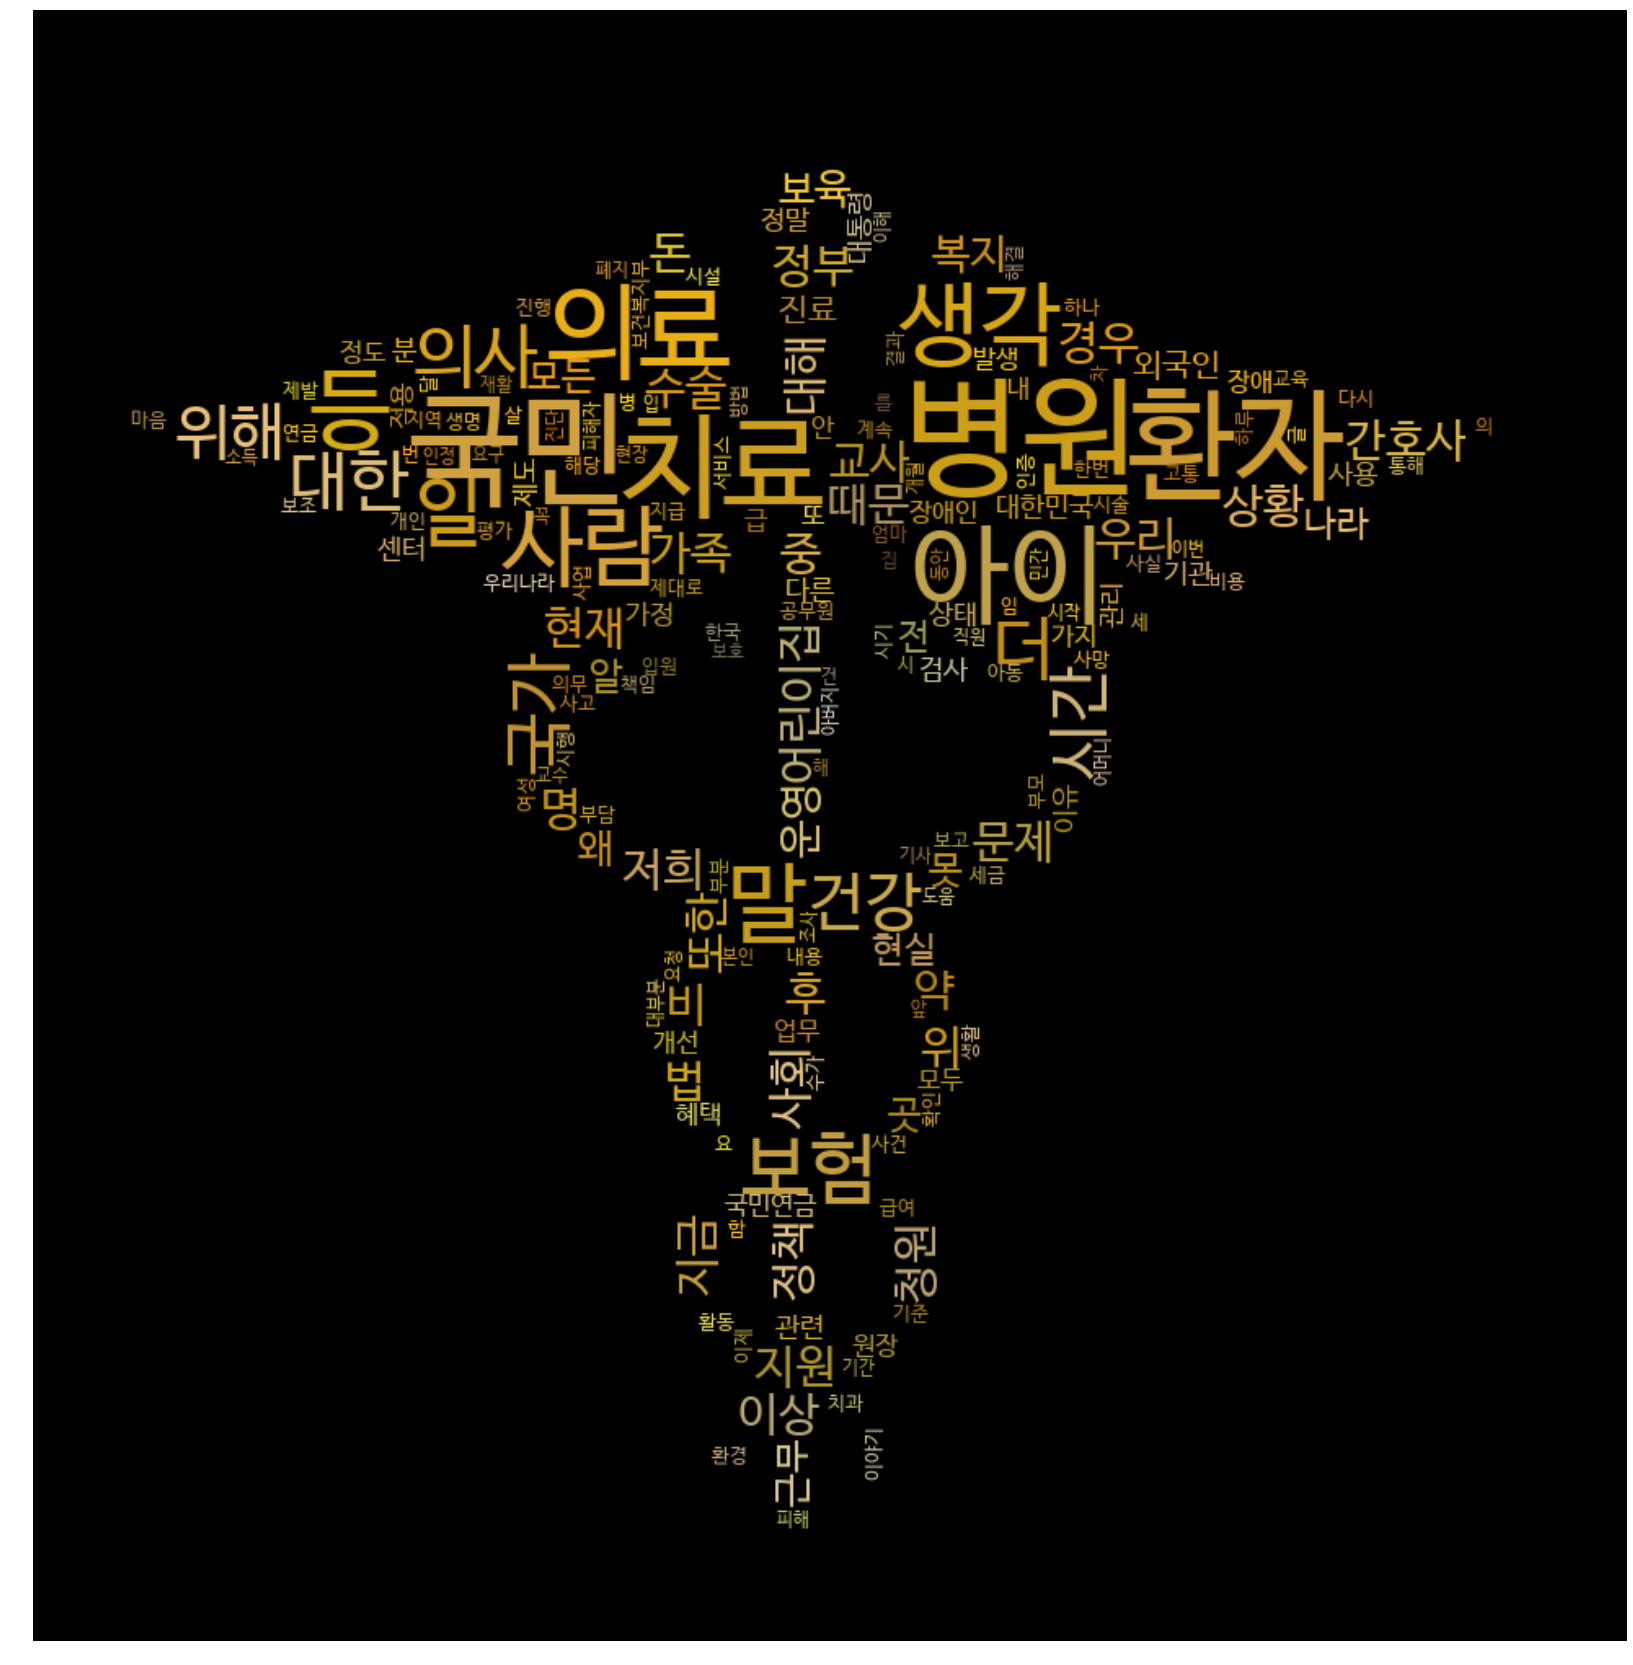

In [48]:
make_cloud("보건복지","보건복지1.jpg",state="img",background_color_n='black',max_font_size_n = 80)

197373
ok


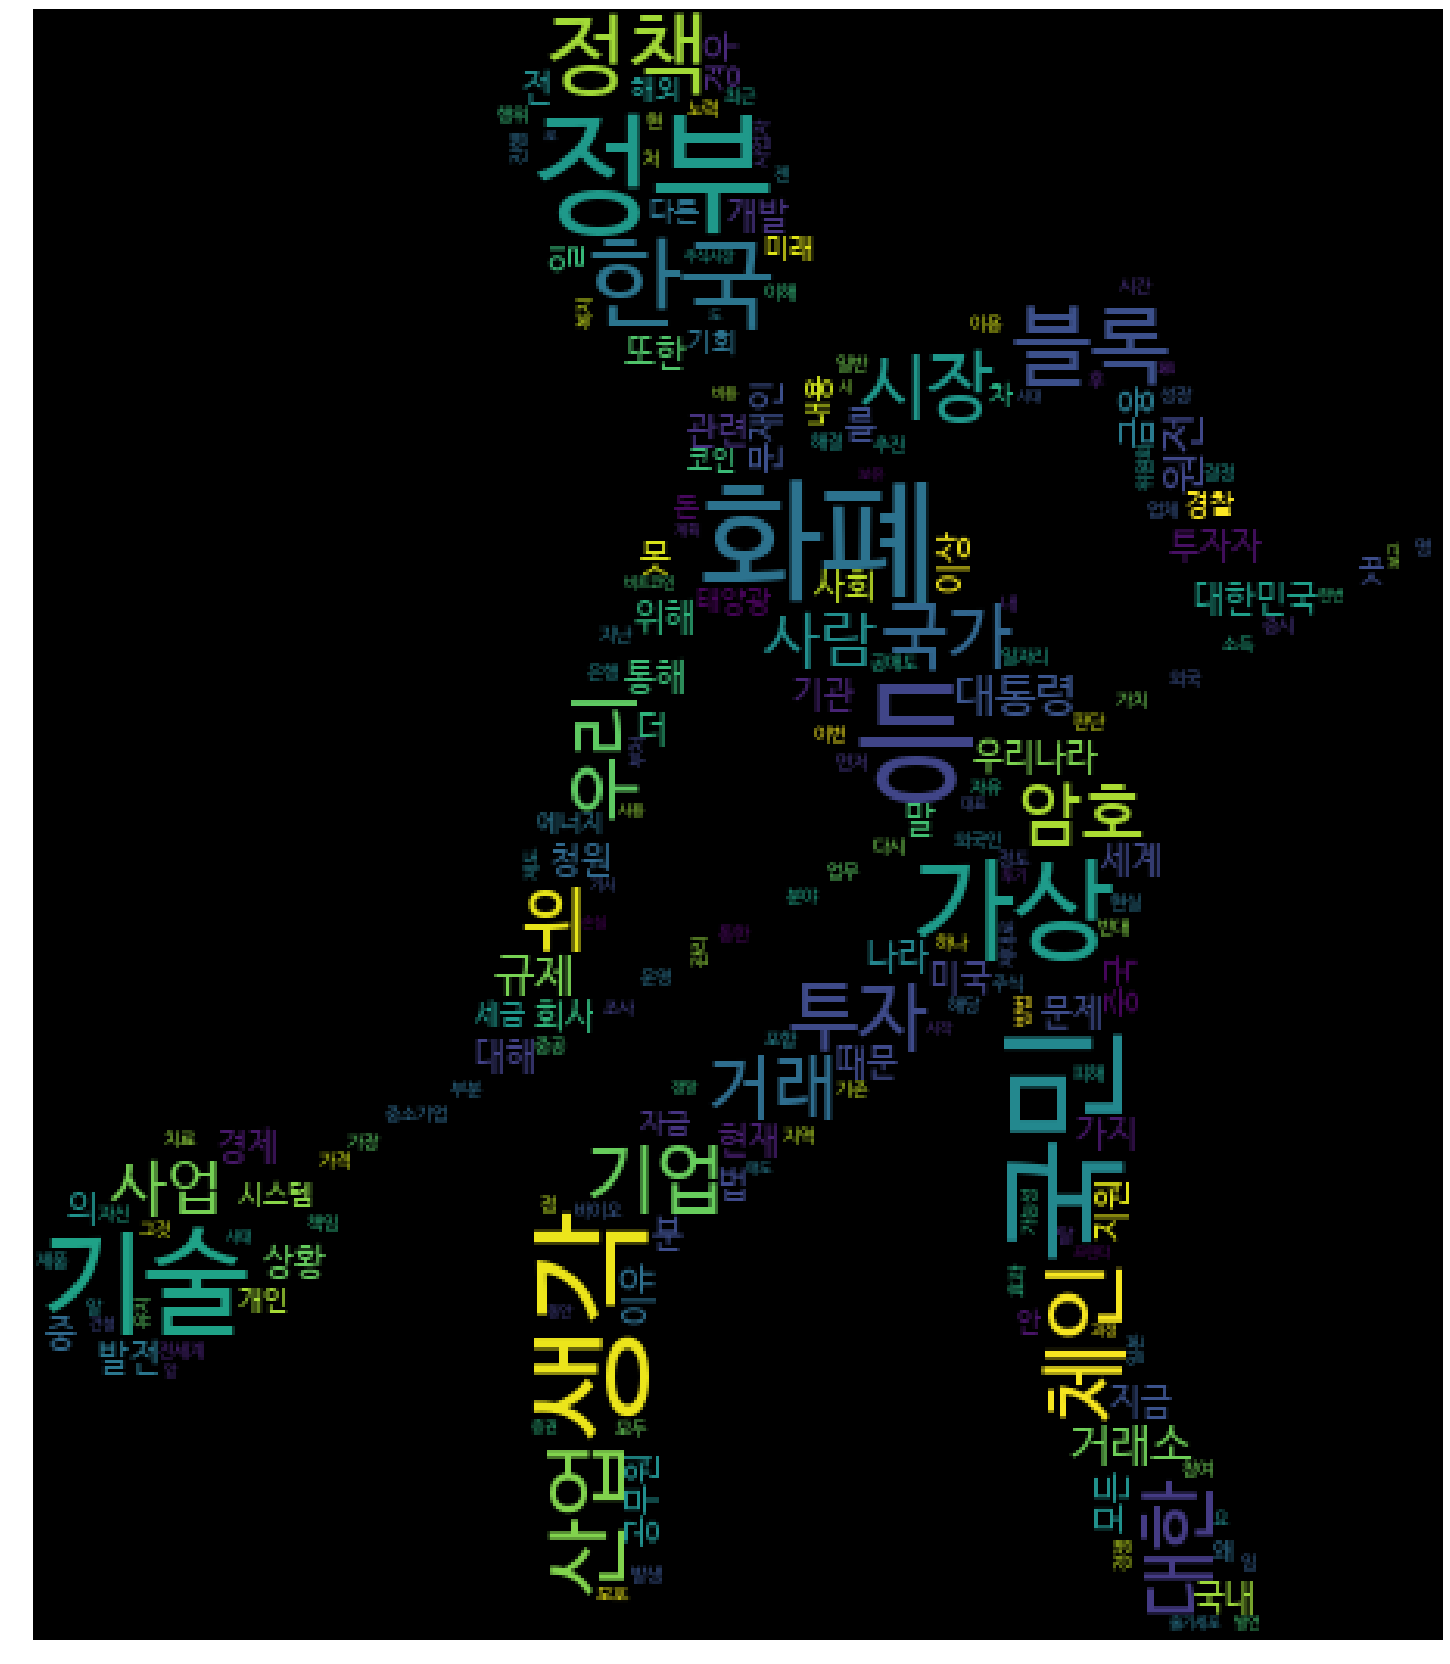

In [63]:
make_cloud("성장동력",max_font_size_n = 80,background_color_n='black')

1550820
ok


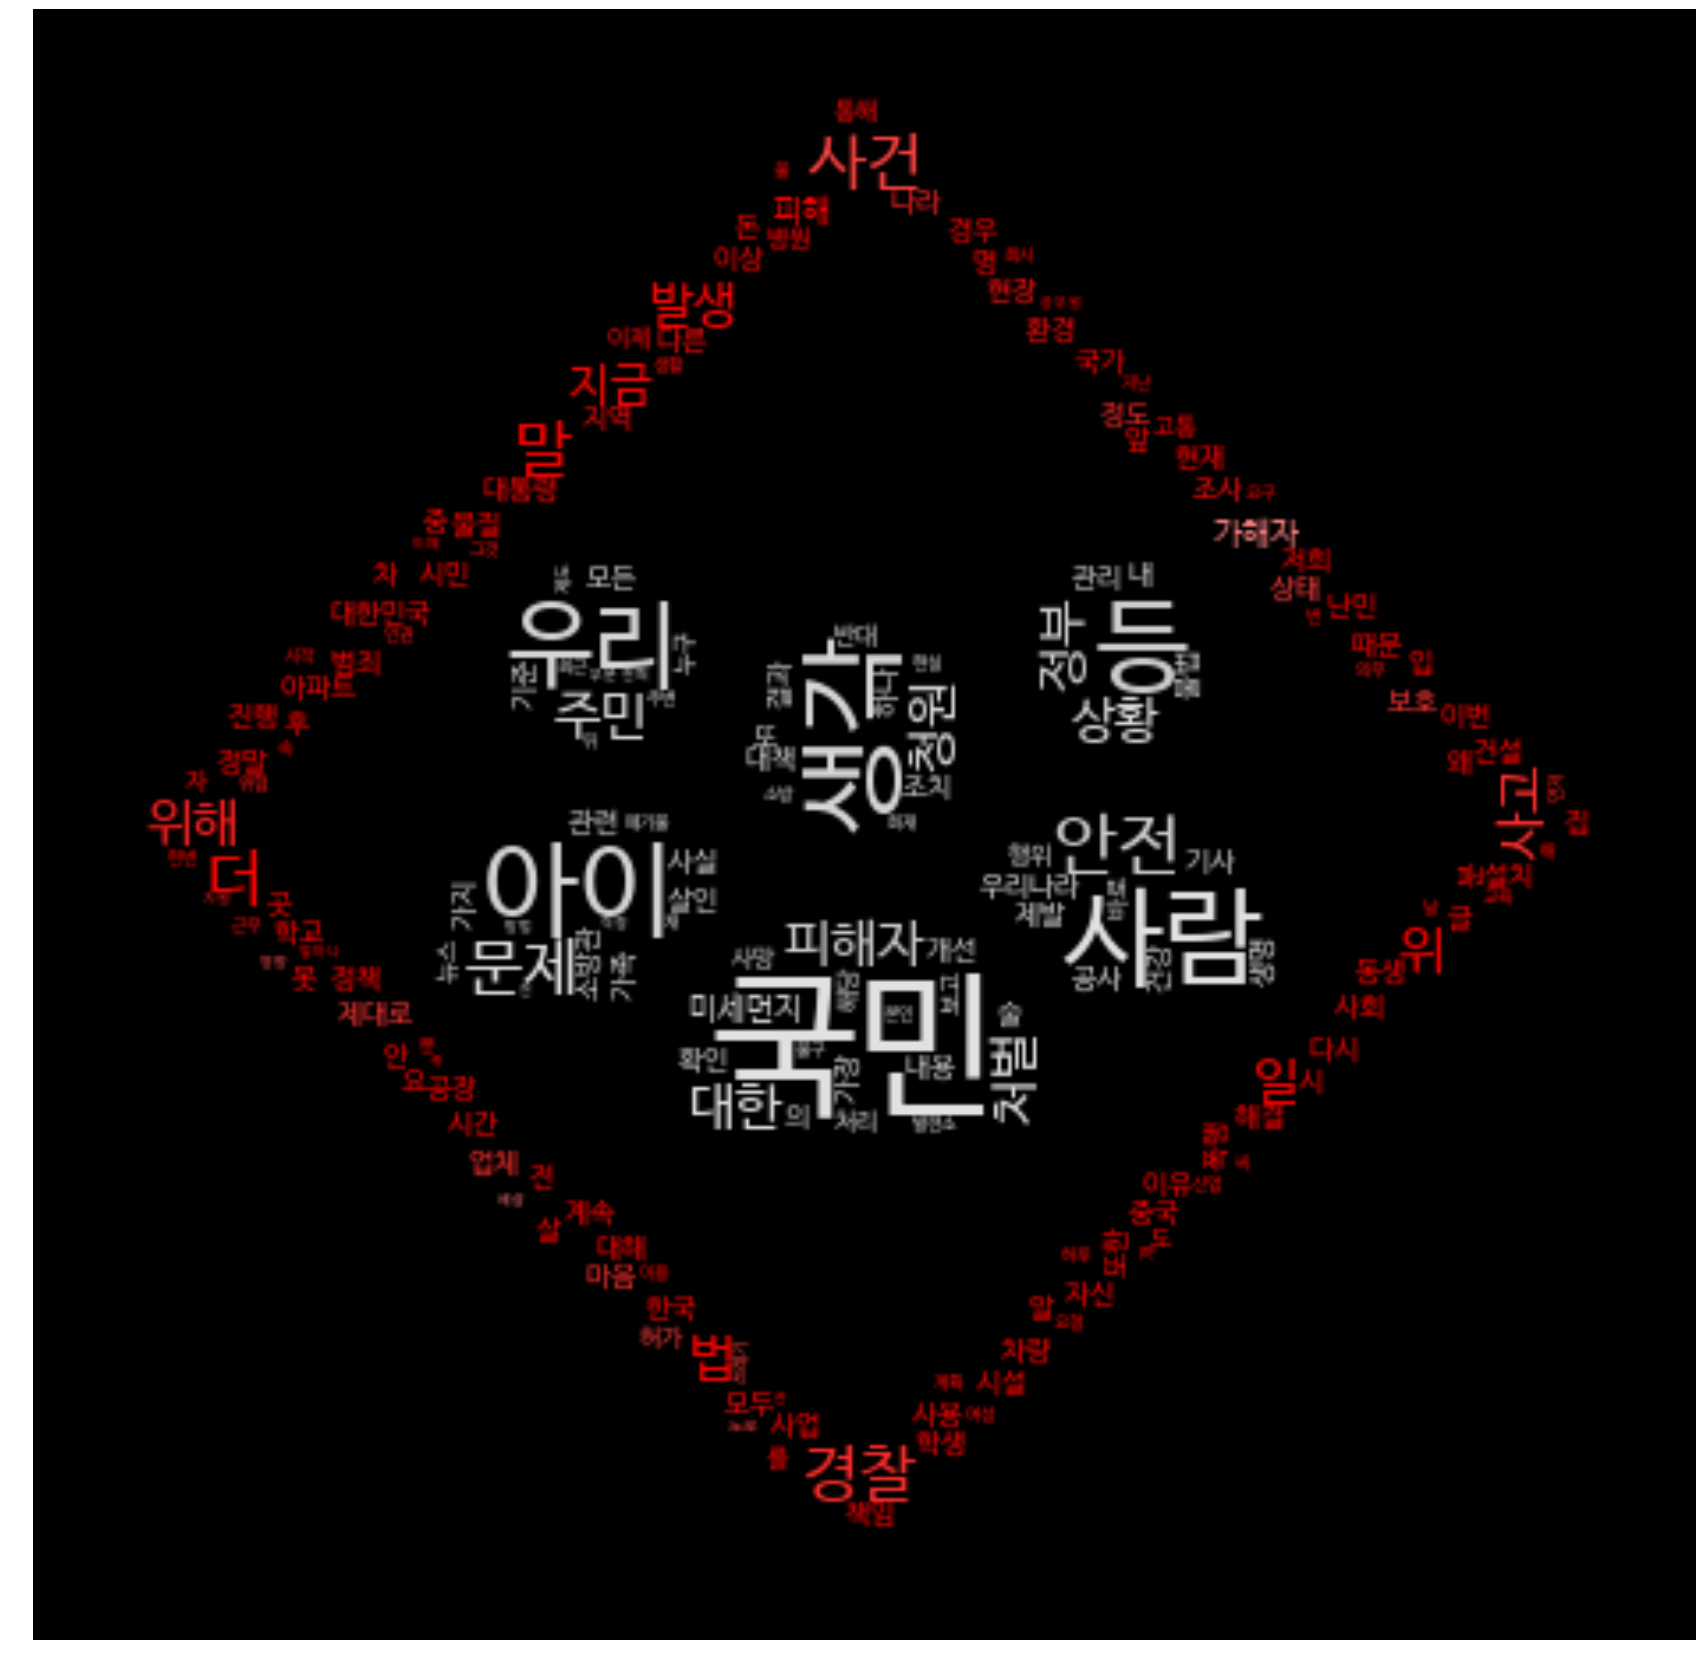

In [14]:
make_cloud("안전/환경","안전환경1.png",max_font_size_n = 80,state="img",background_color_n='black')

856066
ok


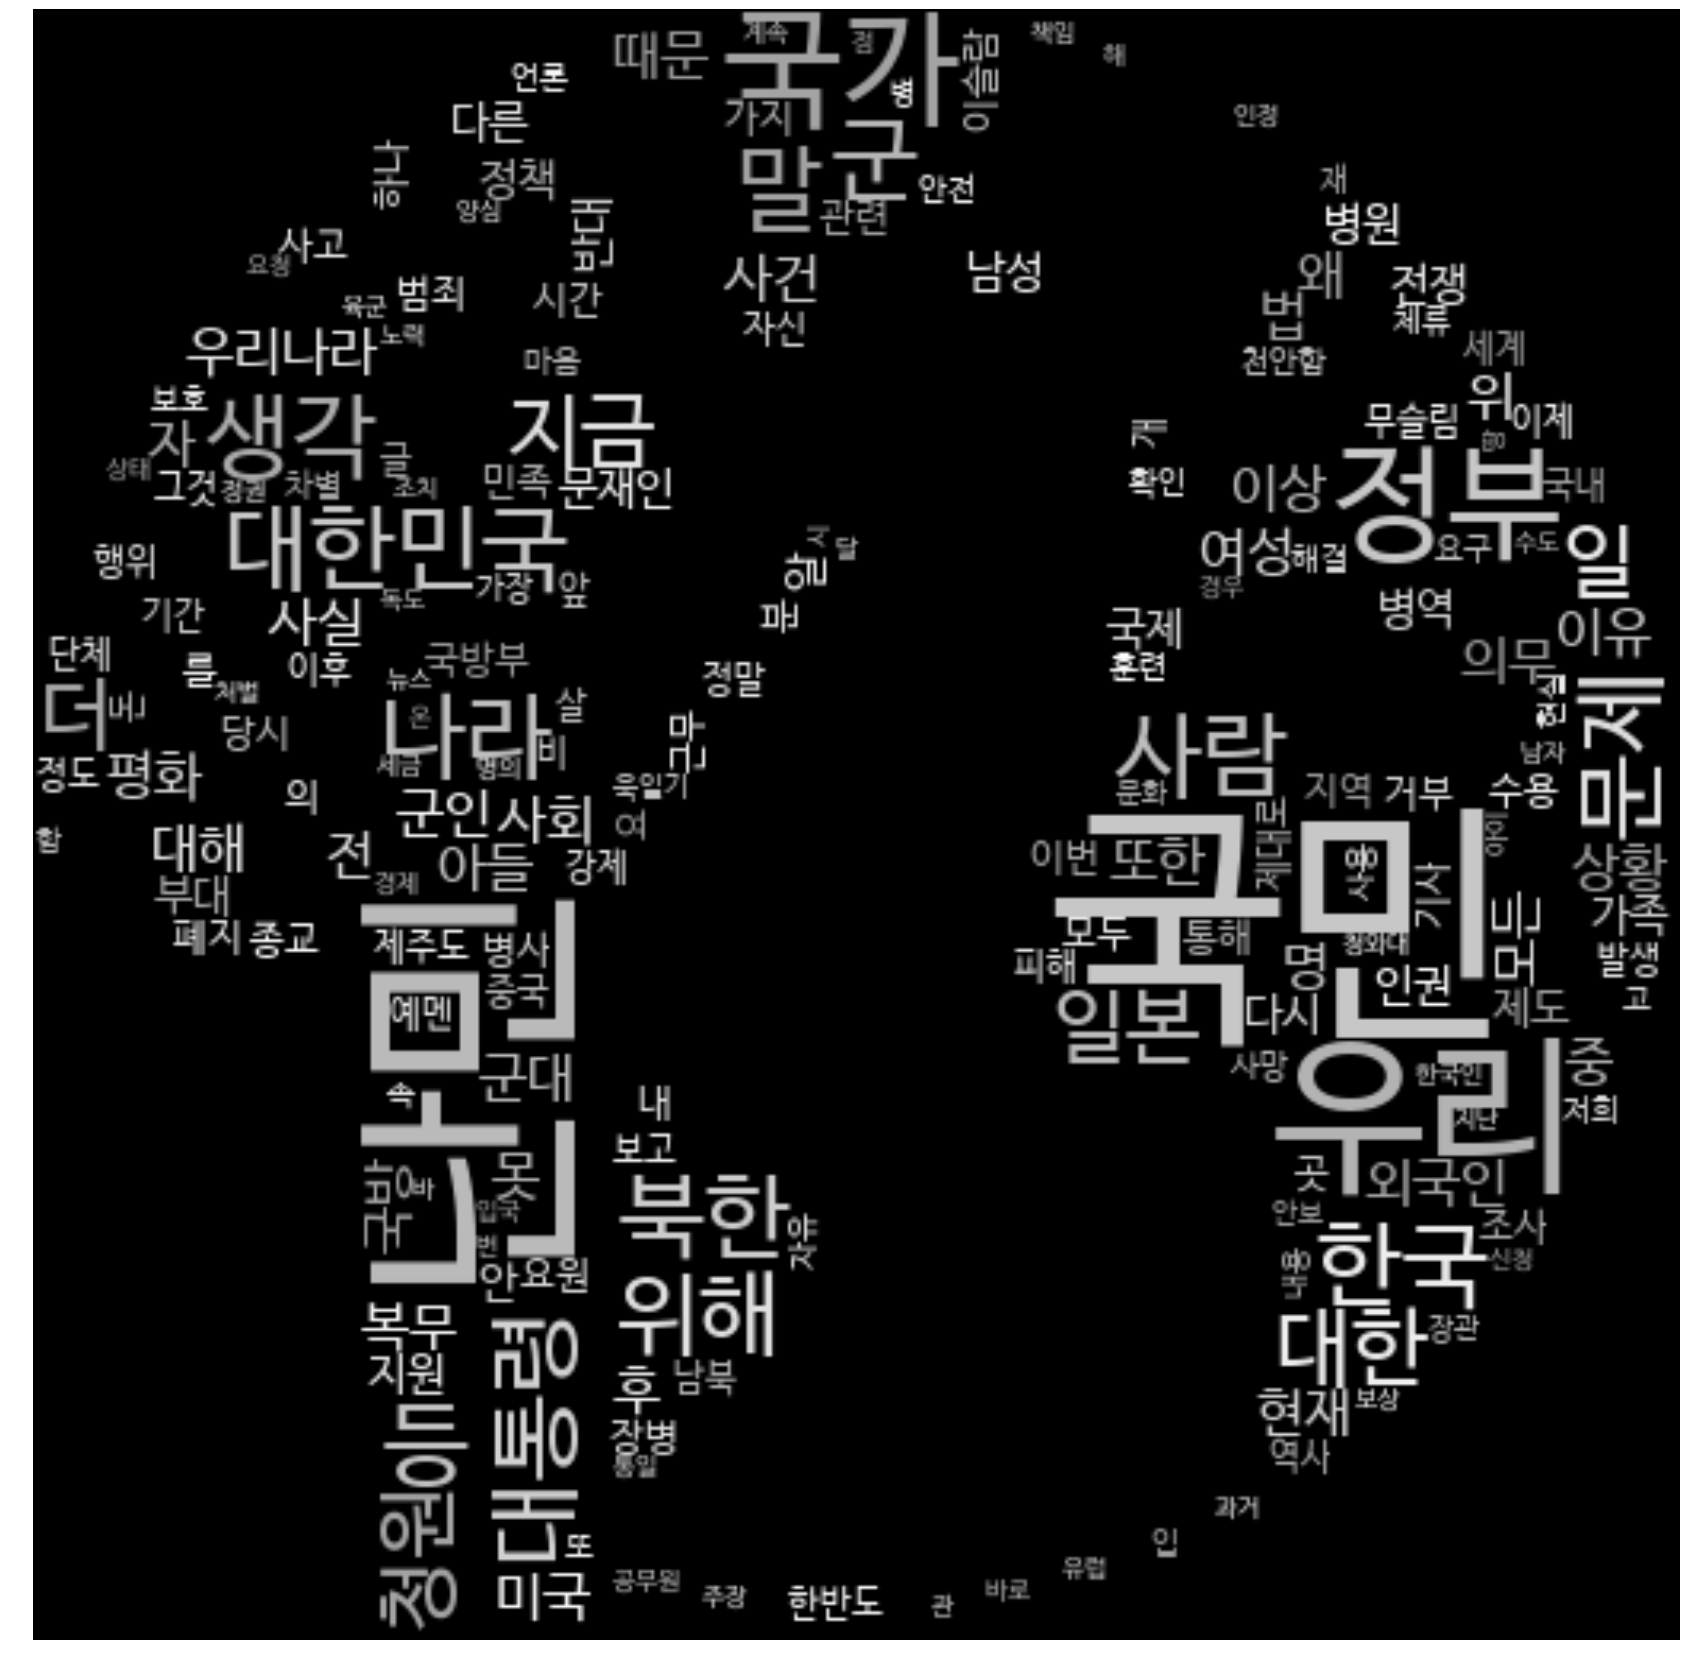

In [61]:
make_cloud("외교/통일/국방","외교_통일_국방1.png", background_color_n='black',max_font_size_n = 100,state="grey")

2231683
ok


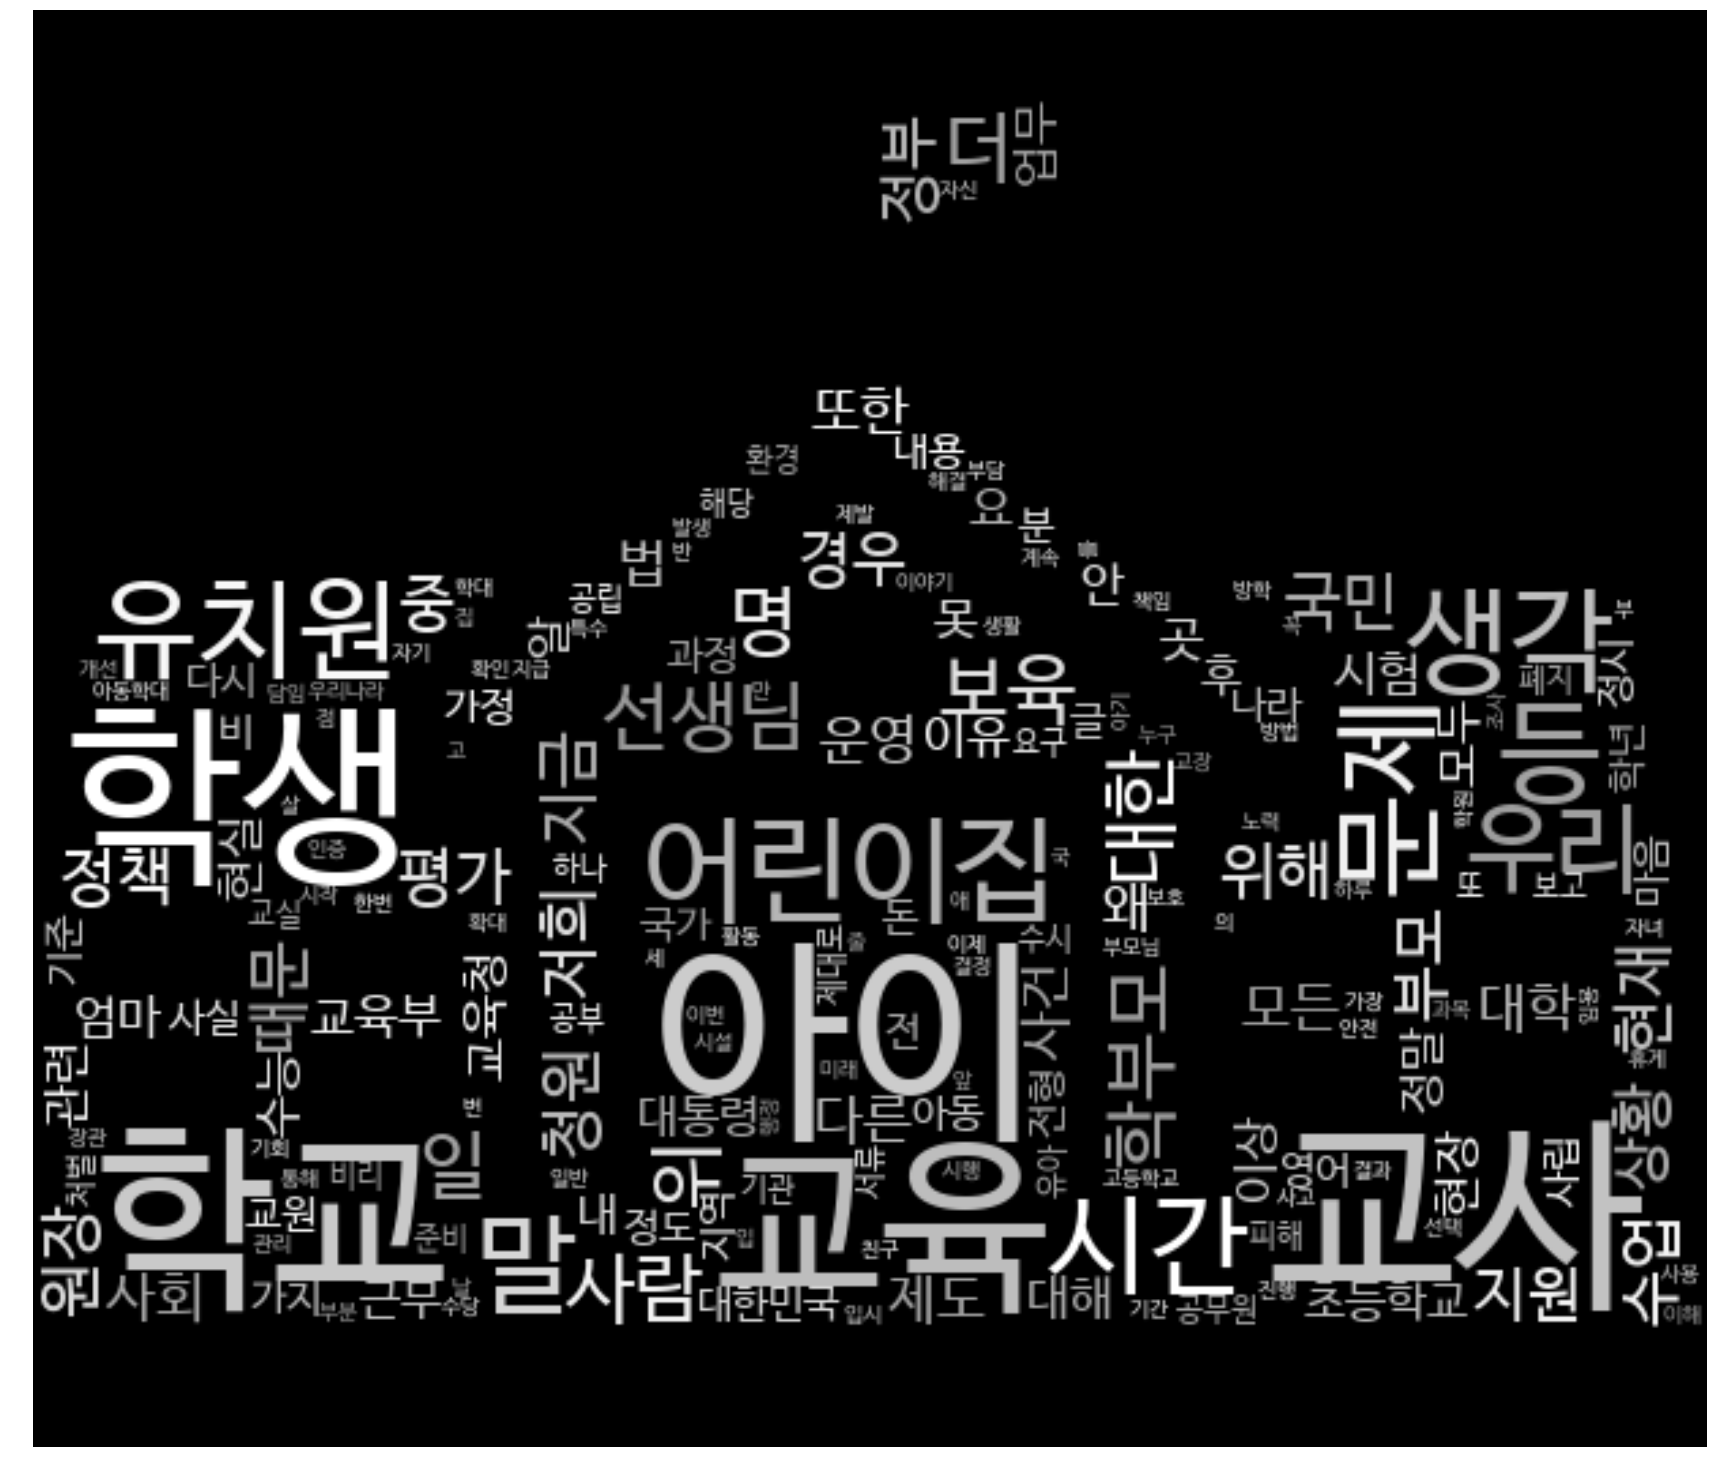

In [62]:
make_cloud("육아/교육","육아교육1.png",background_color_n='black',max_font_size_n = 80,state="grey")

2662840
ok


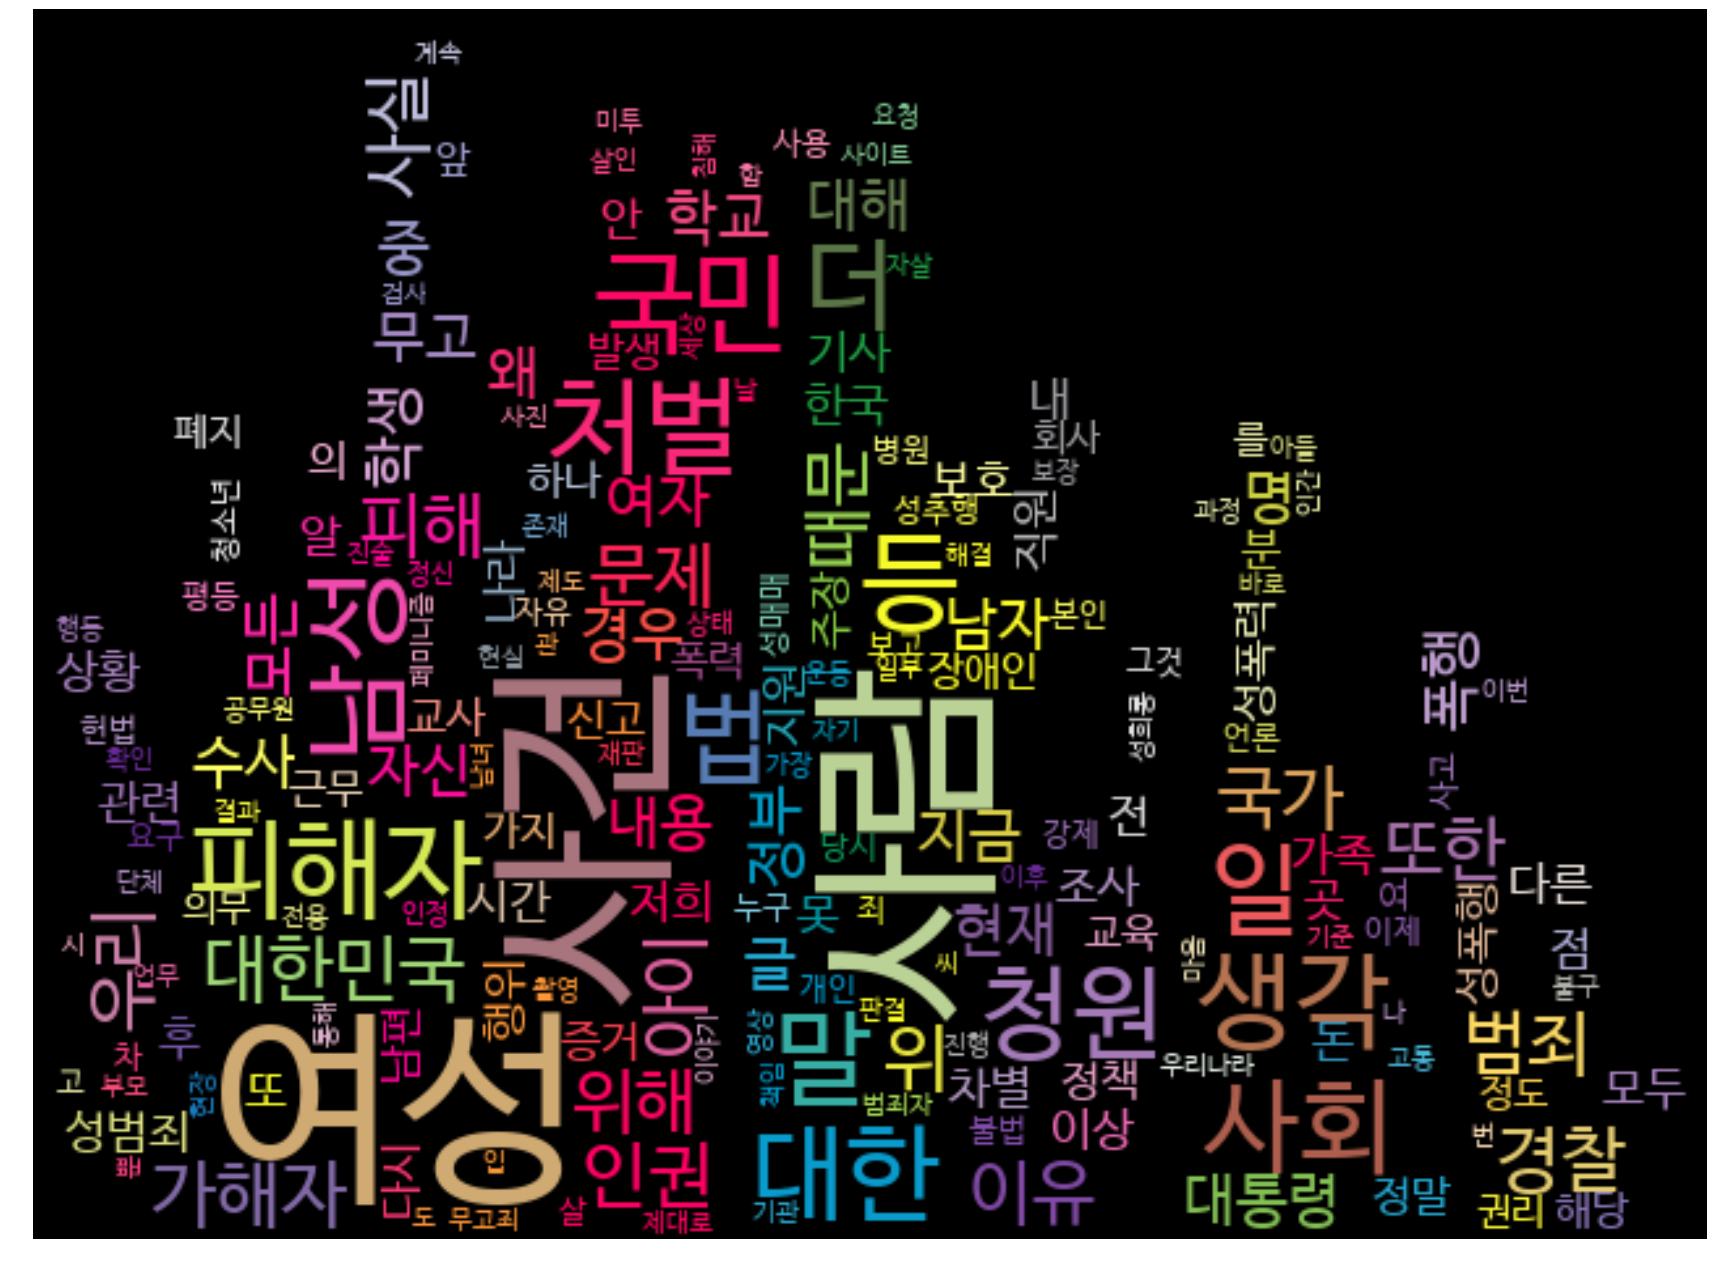

In [50]:
make_cloud("인권/성평등","인권_성평등1.png",state="img",background_color_n='black',max_font_size_n = 80)

927605
ok


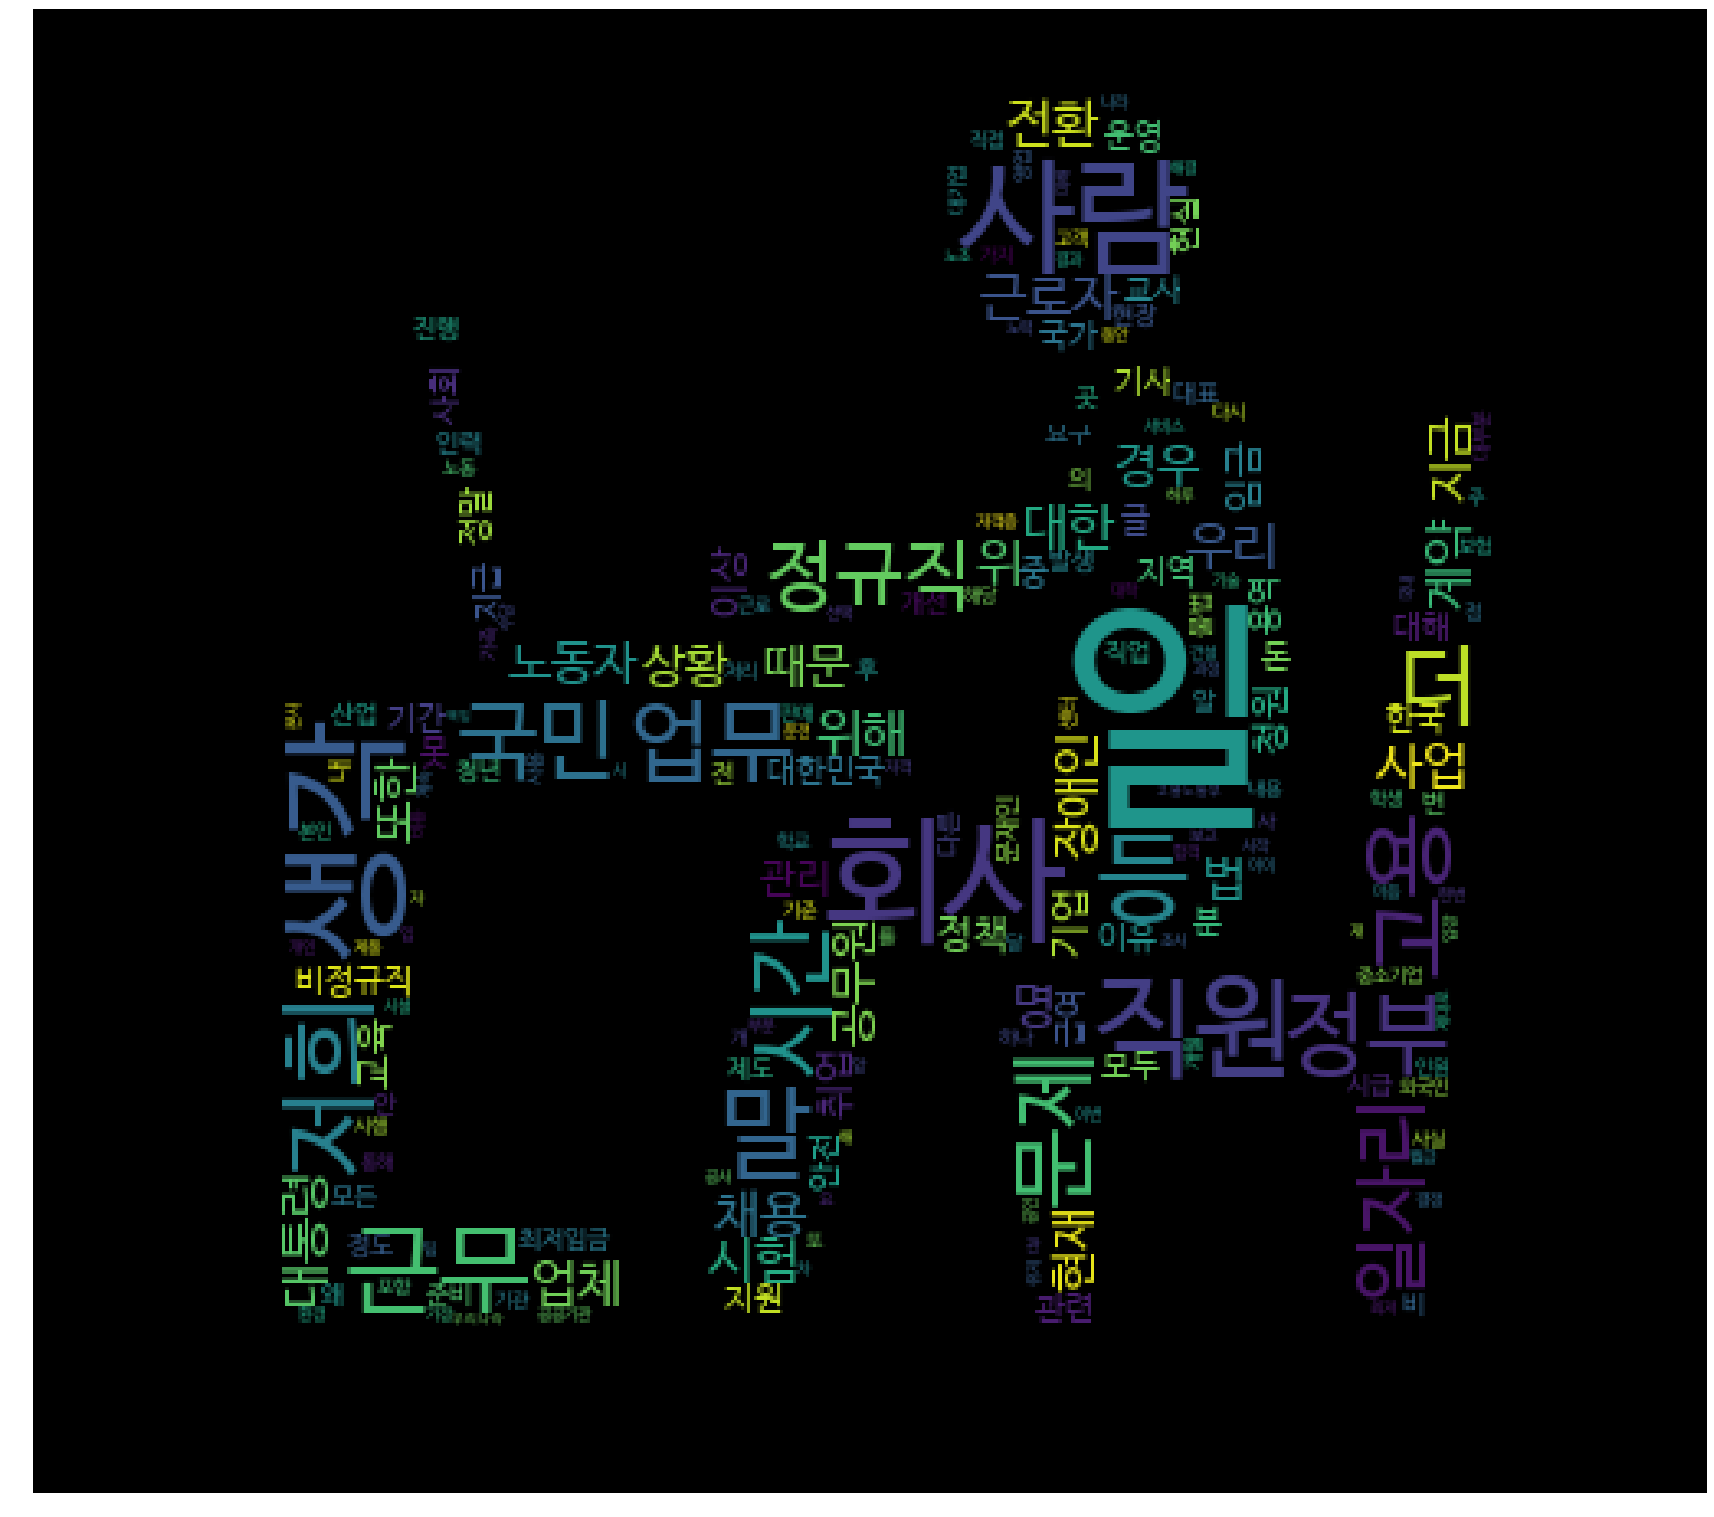

In [64]:
make_cloud("일자리",background_color_n='black',max_font_size_n = 80)

180197
ok


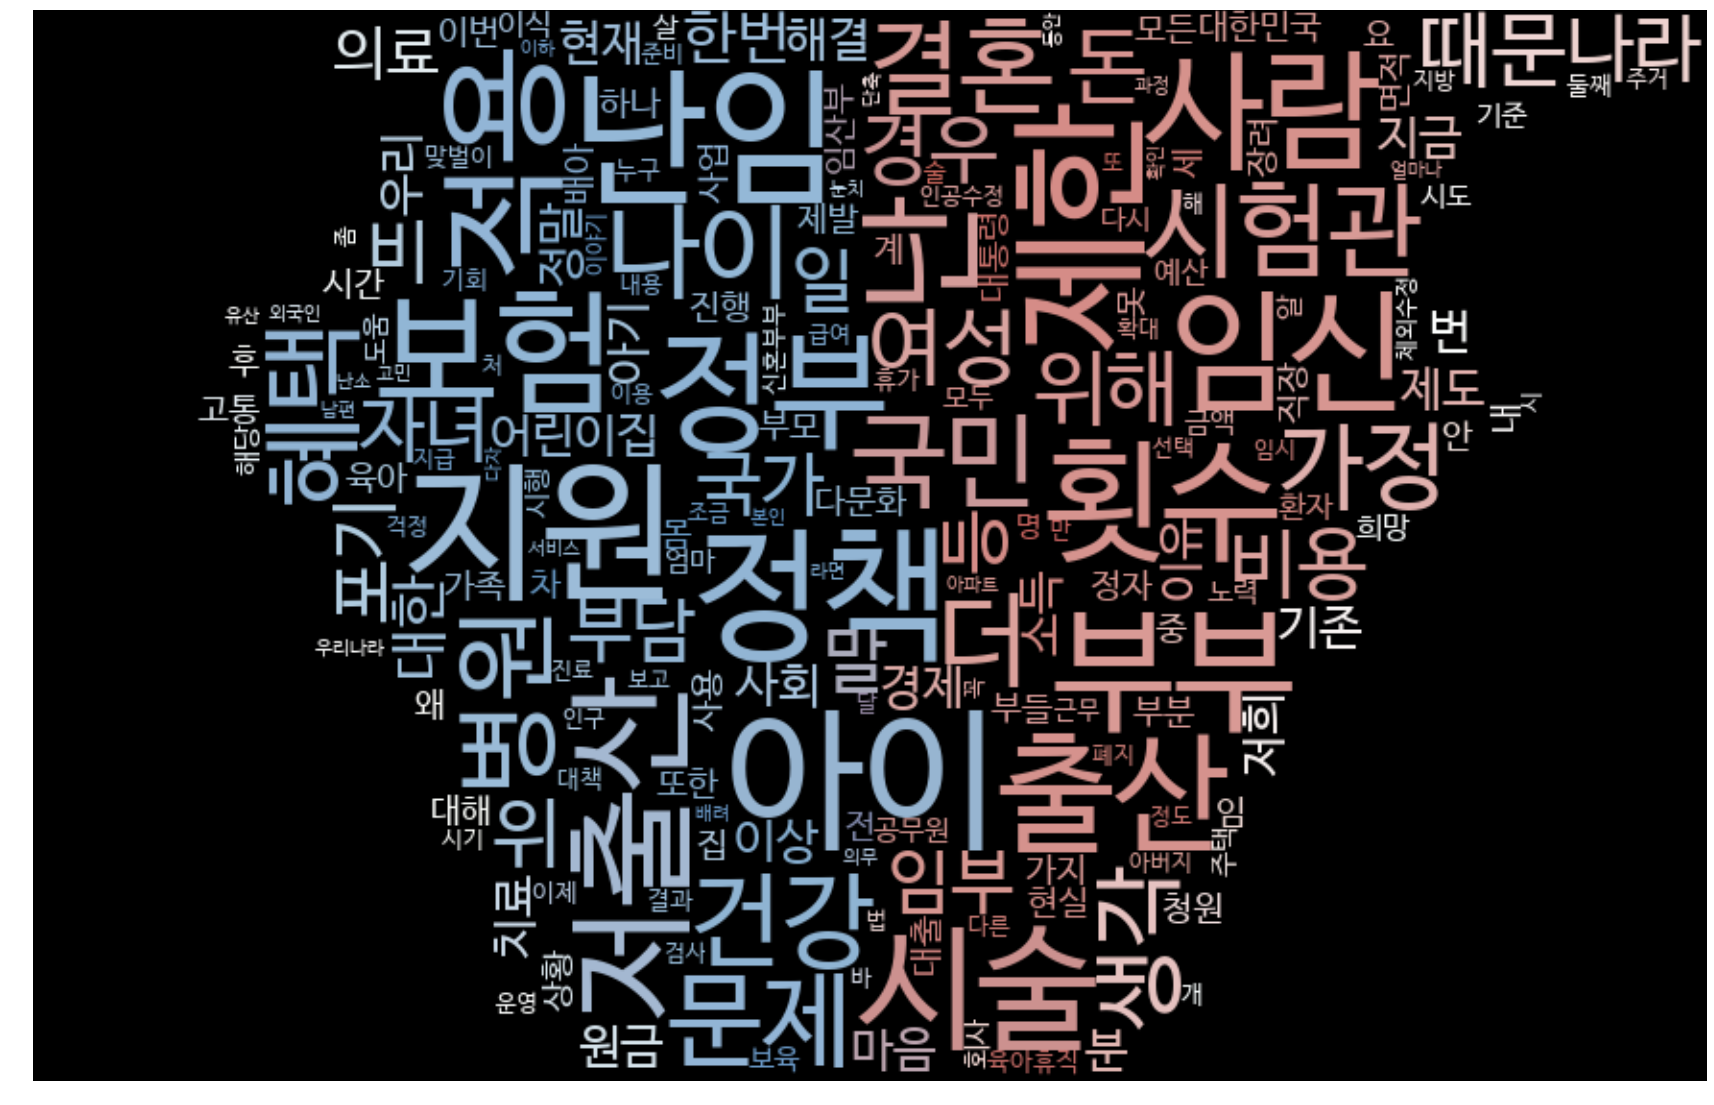

In [52]:
make_cloud("저출산/고령화대책","저출산_고령화대책1.png",state="img",background_color_n='black',max_font_size_n = 80)

1451926
ok


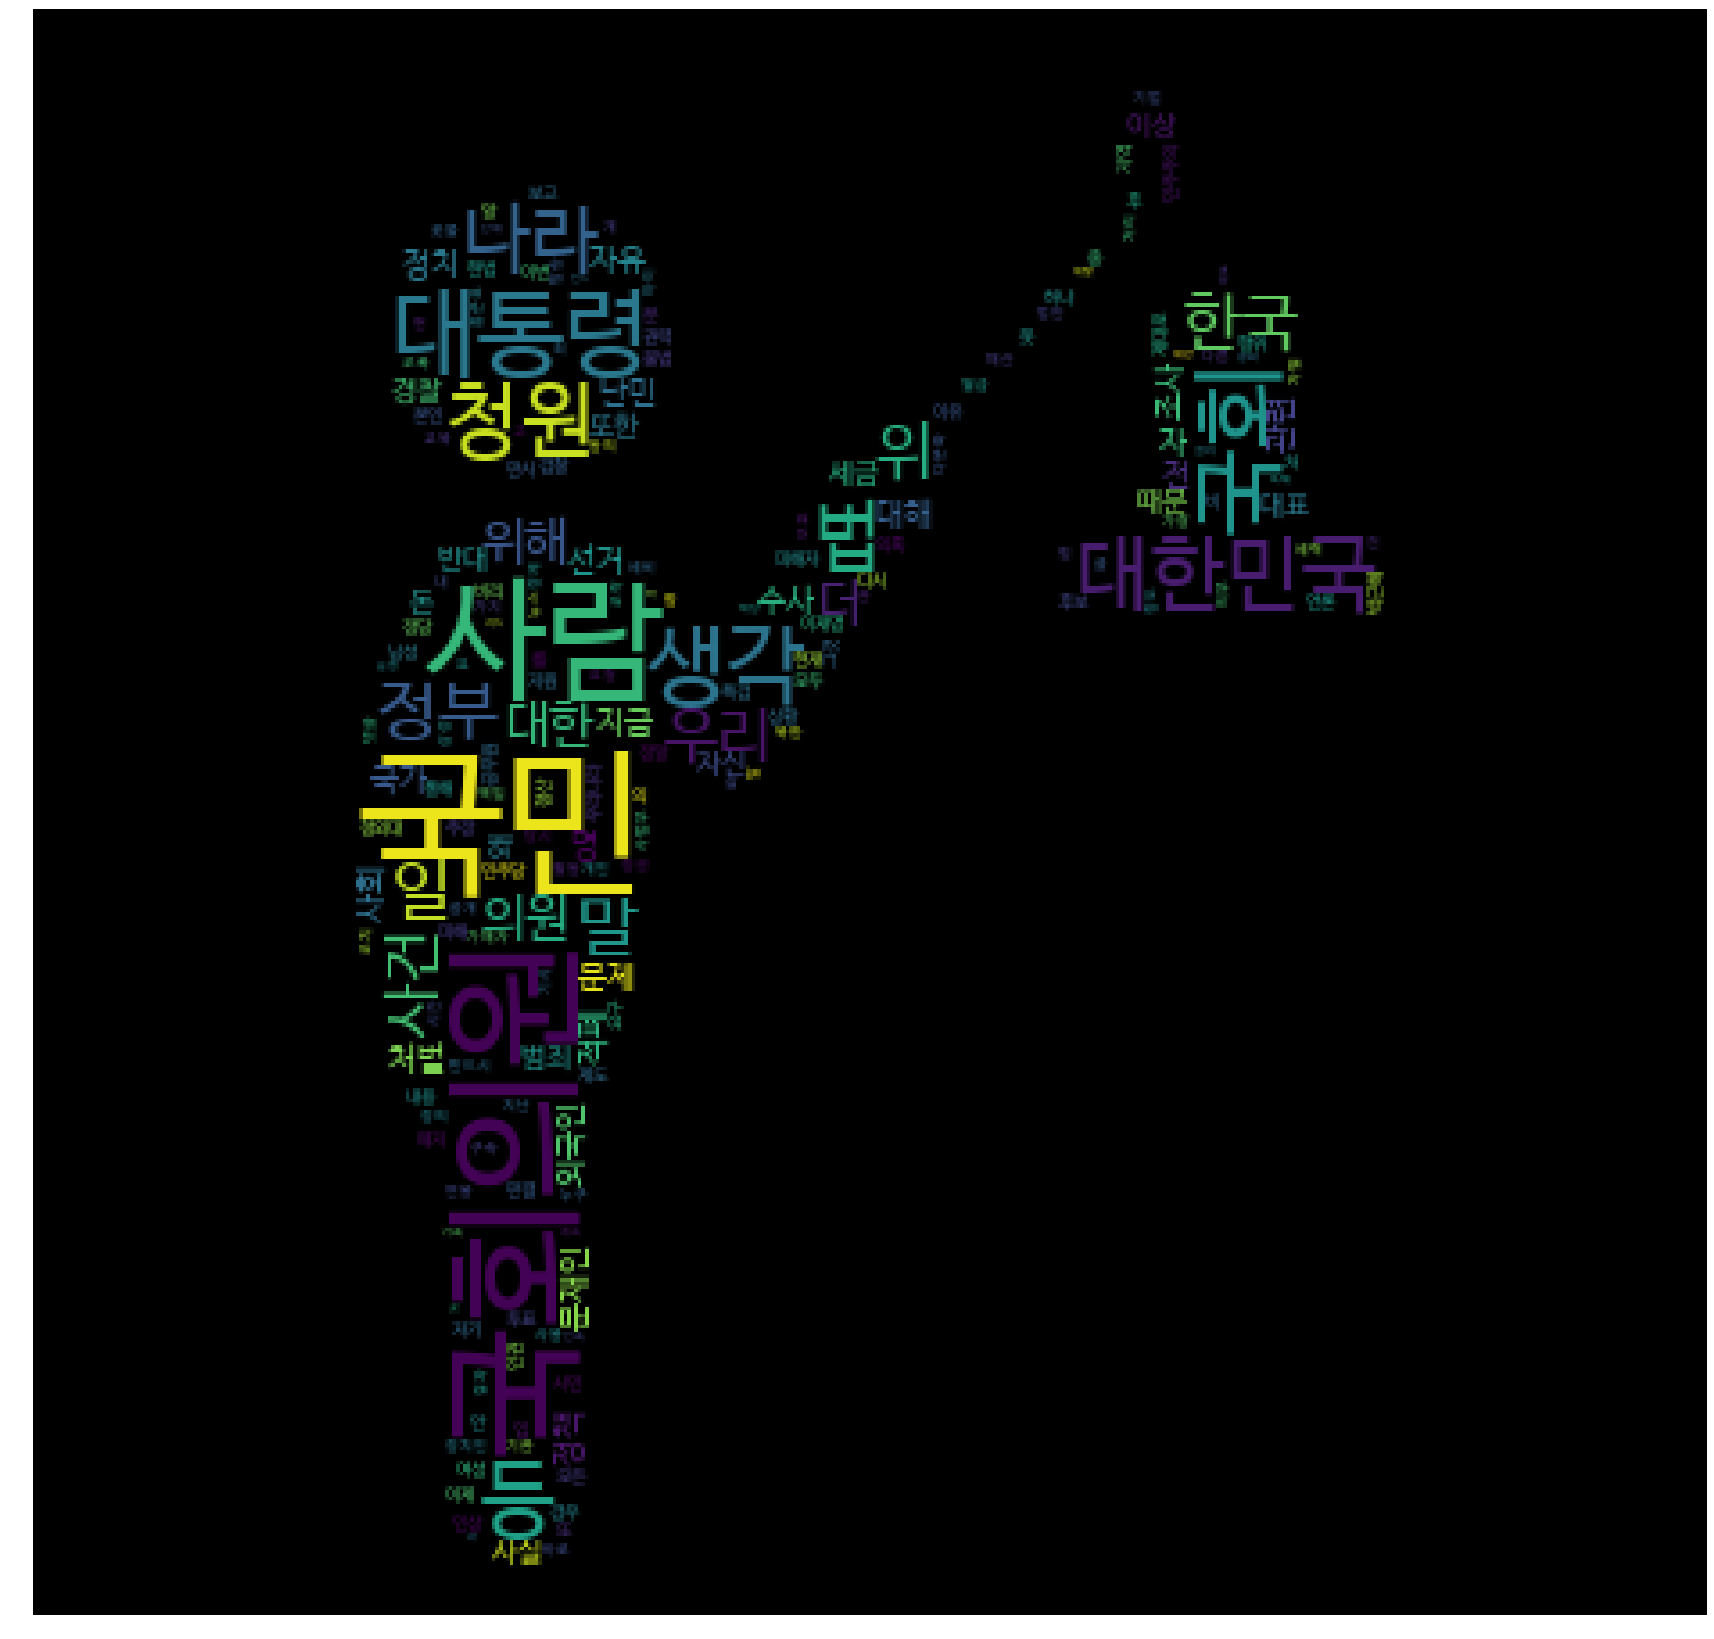

In [53]:
make_cloud("정치개혁",background_color_n='black',max_font_size_n = 100)

940915
ok


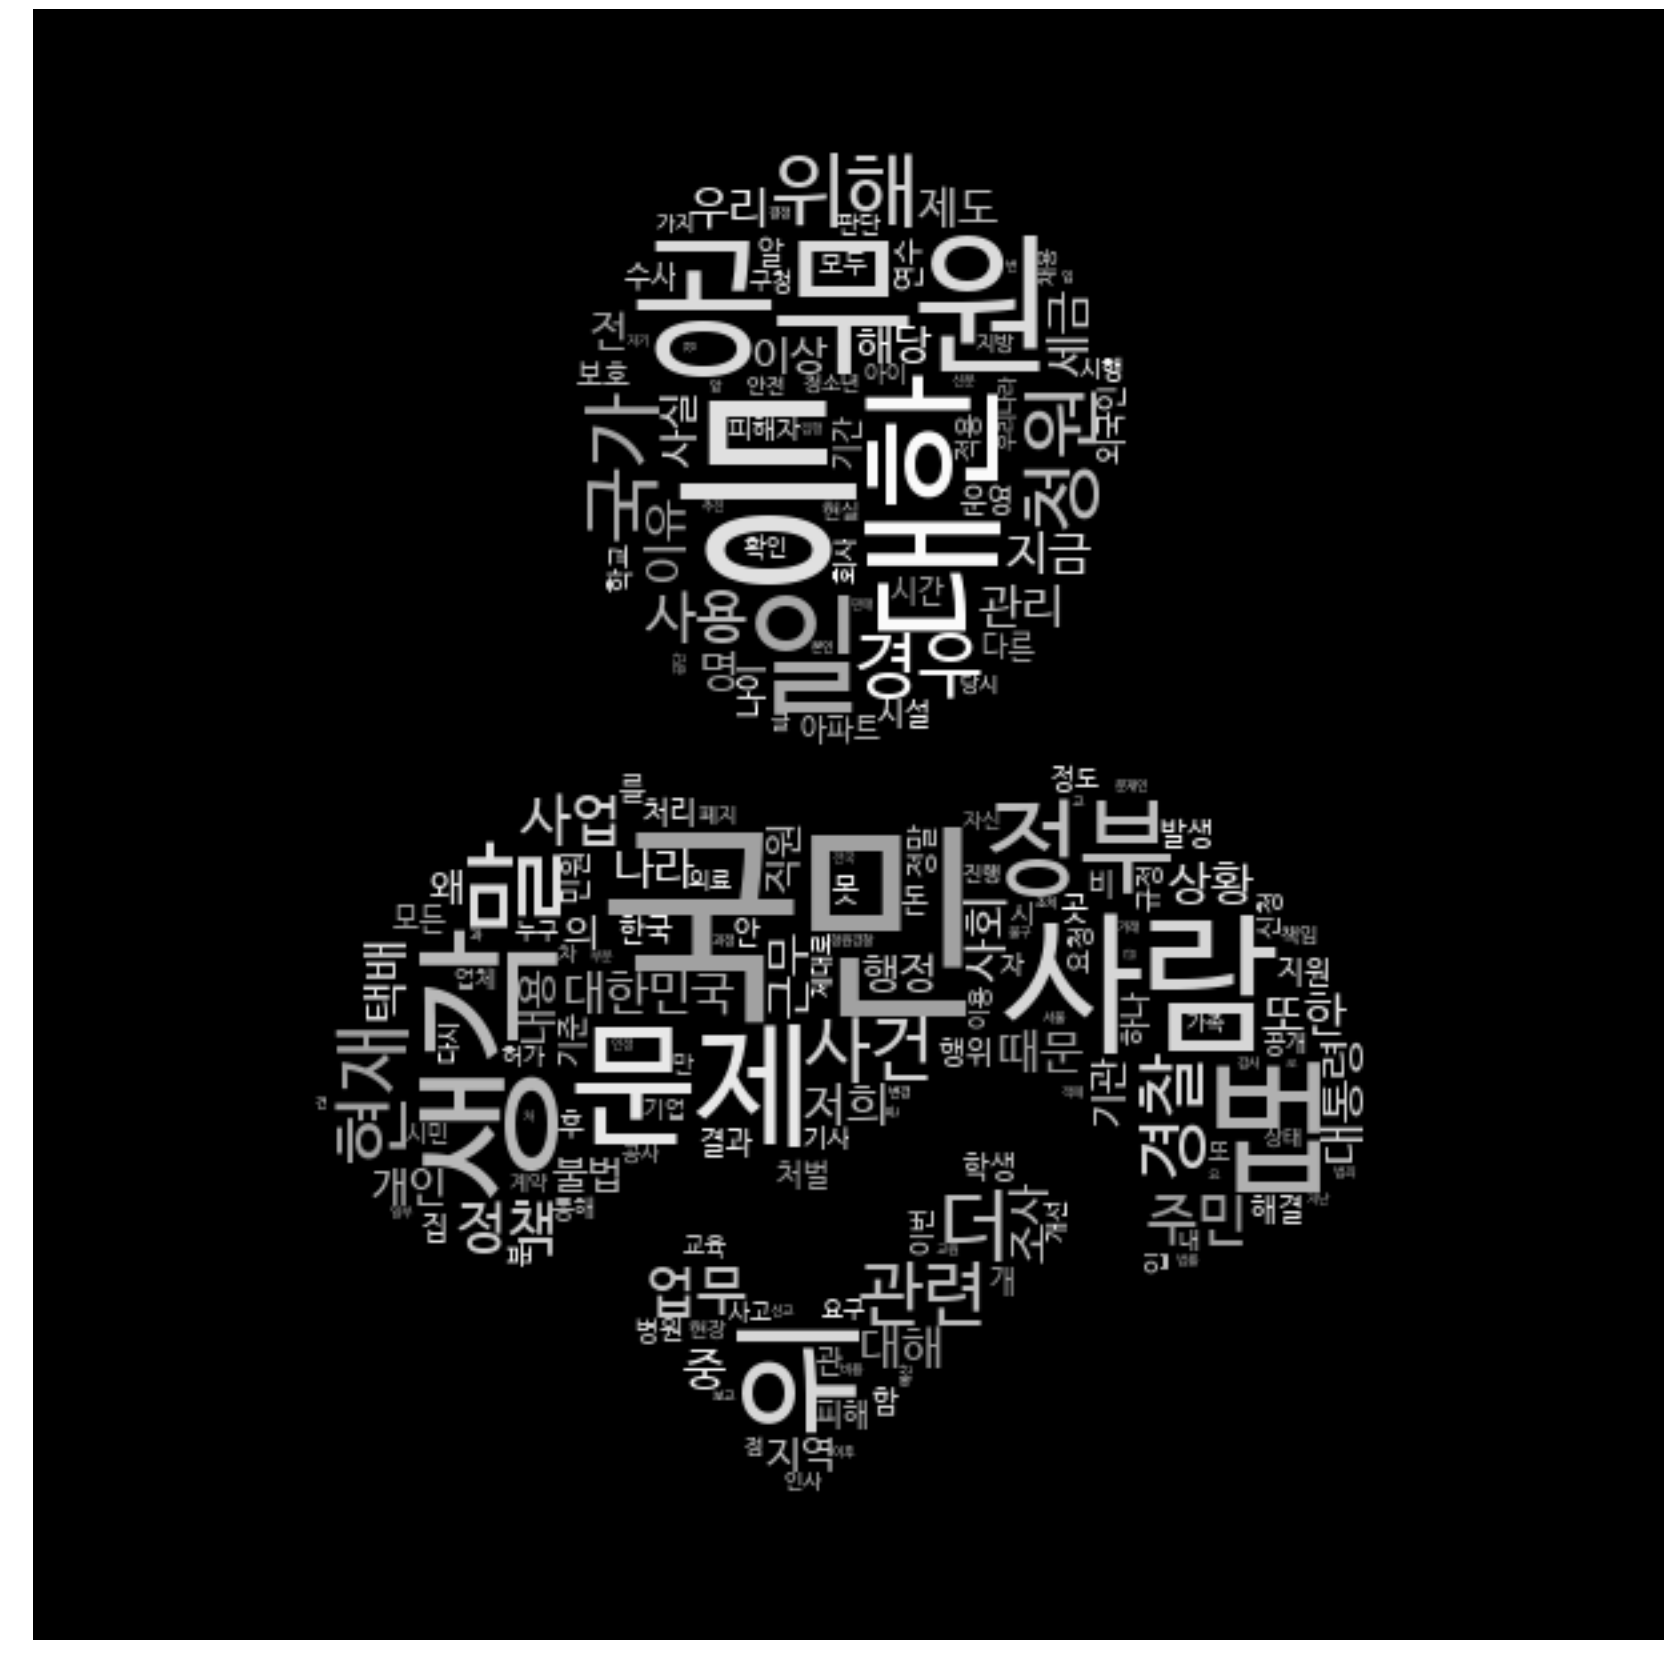

In [12]:
make_cloud("행정","행정1.jpg",background_color_n='black',max_font_size_n = 80,state="grey")